<a href="https://colab.research.google.com/github/hmarathe420/Breast_Cancer_Detection/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name**    - Breast Cancer Detection



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**            - Harshal Marathe

## **Project Summary -**

As an AIML intern at InternPE, I undertook a project focused on Breast Cancer Detection, leveraging machine learning techniques to predict the likelihood of individuals developing Breast Cancer based on their medical and lifestyle attributes.


This project focused on breast cancer detection using machine learning techniques. It followed a structured approach, including data analysis (EDA), data visualization, data preprocessing, data splitting, and feature selection. The dataset used contains clinical and diagnostic features extracted from breast cancer biopsies.

Data Analysis and Visualization: The project began with a comprehensive exploration of the dataset through exploratory data analysis (EDA) and data visualization. This step allowed for a deeper understanding of the dataset's characteristics, distribution of features, and initial insights into the data.

Data Preprocessing: To prepare the data for machine learning, data preprocessing was performed. This included handling missing values, encoding categorical variables, and scaling numerical features as necessary. Data preprocessing ensures that the data is in a suitable format for model training.

Data Splitting: The dataset was divided into training and testing sets to evaluate the model's performance accurately. This step prevents overfitting and provides a realistic assessment of the model's generalization capability.

Feature Selection: Feature selection techniques were applied to identify the most relevant features for breast cancer detection. By reducing the number of features while maintaining or improving accuracy, the model becomes more interpretable and efficient.

Model Implementation: A Random Forest Classifier was chosen as the machine learning model for breast cancer detection. This ensemble learning method demonstrated exceptional performance during training, achieving an accuracy of 98% on the training dataset and 96% on the testing dataset.

## **GitHub Link -**

GitHub Link --> [Tap Here](https://github.com/hmarathe420/Diabetes_Prediction)



## **Problem Statement**


Breast cancer is a significant public health concern, and early detection is crucial for improving patient outcomes. The aim of this project is to develop a machine learning model for breast cancer detection using a dataset of clinical and diagnostic features. The goal is to create an accurate and reliable system that can assist medical professionals in identifying potential cases of breast cancer, thus facilitating early intervention and treatment.

### Required Libraries

In [36]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn.datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc


## **Data Collection & Understanding**

In [7]:
# Collecting data from sklearn datasets
data = sklearn.datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)

In [8]:
# Top 5 rows of diabetes dataset
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# adding the 'target' column to the data frame
df['label'] = data.target

In [10]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
# Describing the dataset
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
# shape of dataset
df.shape

(569, 31)

In [13]:
# number of duplicated rows of dataset
df.duplicated().sum()

0

In [14]:
# null values in dataset
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

From the above analysis we can conclude that there are no duplicated rows present and no null values present in our dataset. And our dataset contains 569 Rows and 31 Columns.

## **EDA**

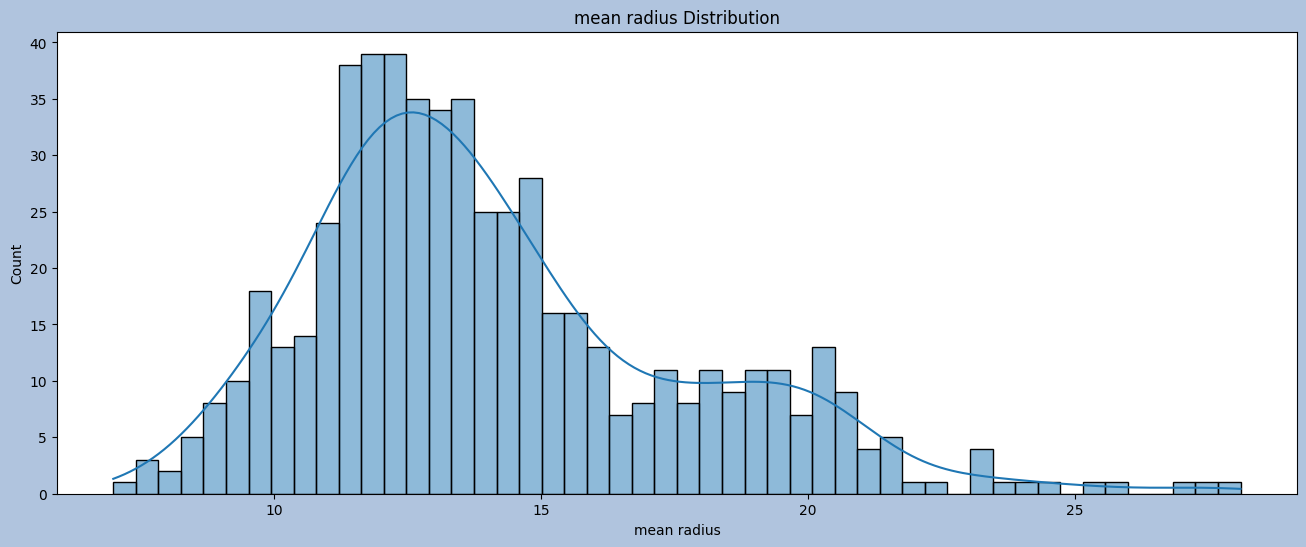

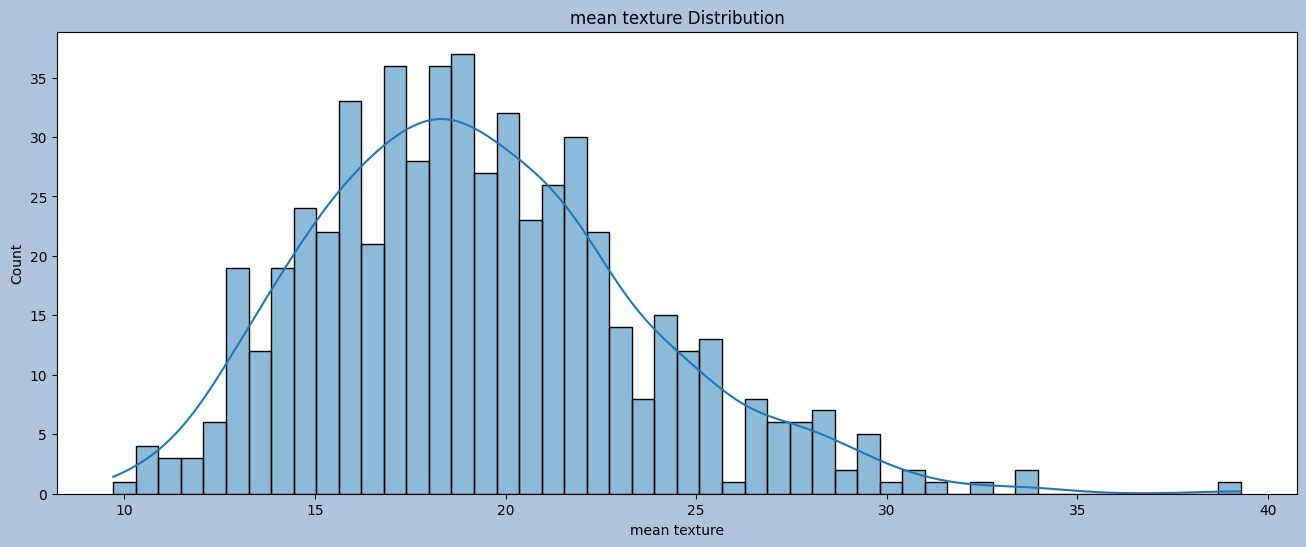

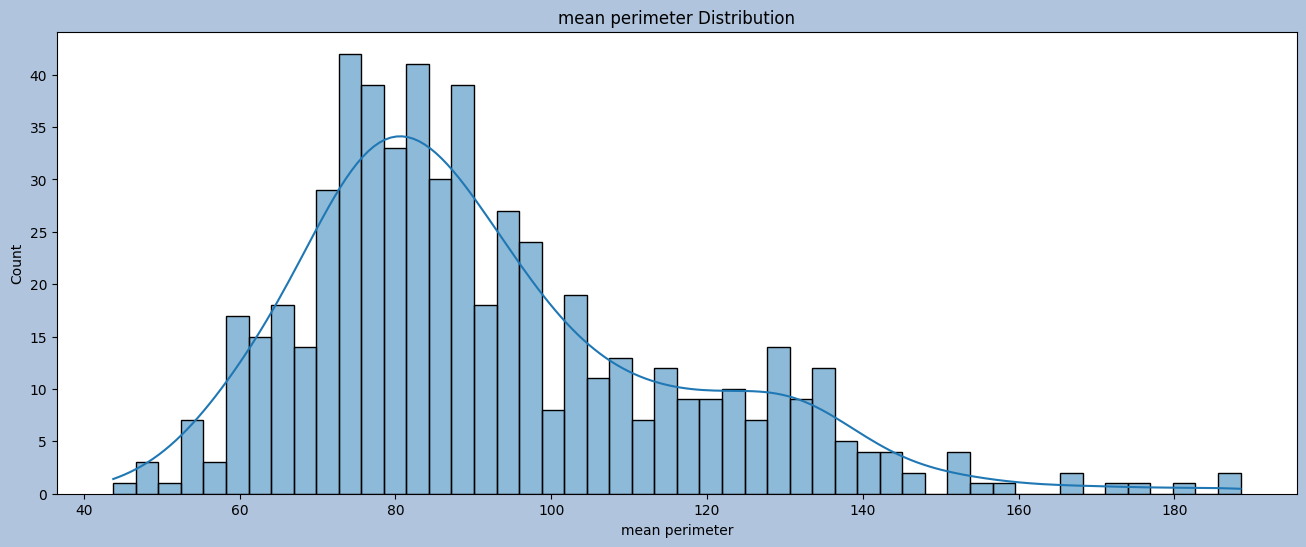

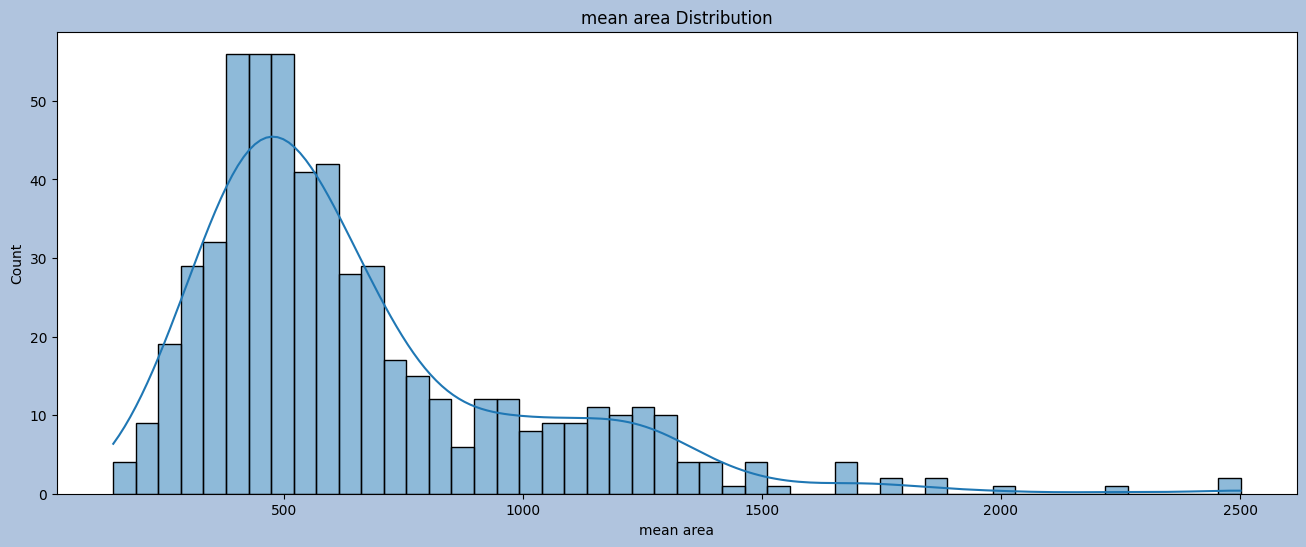

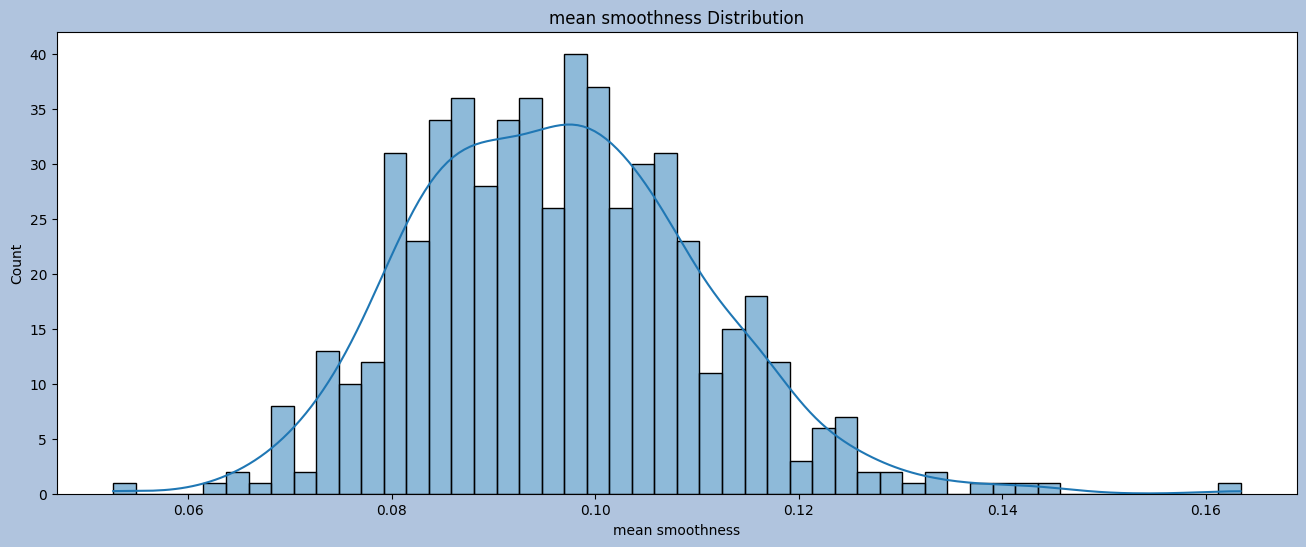

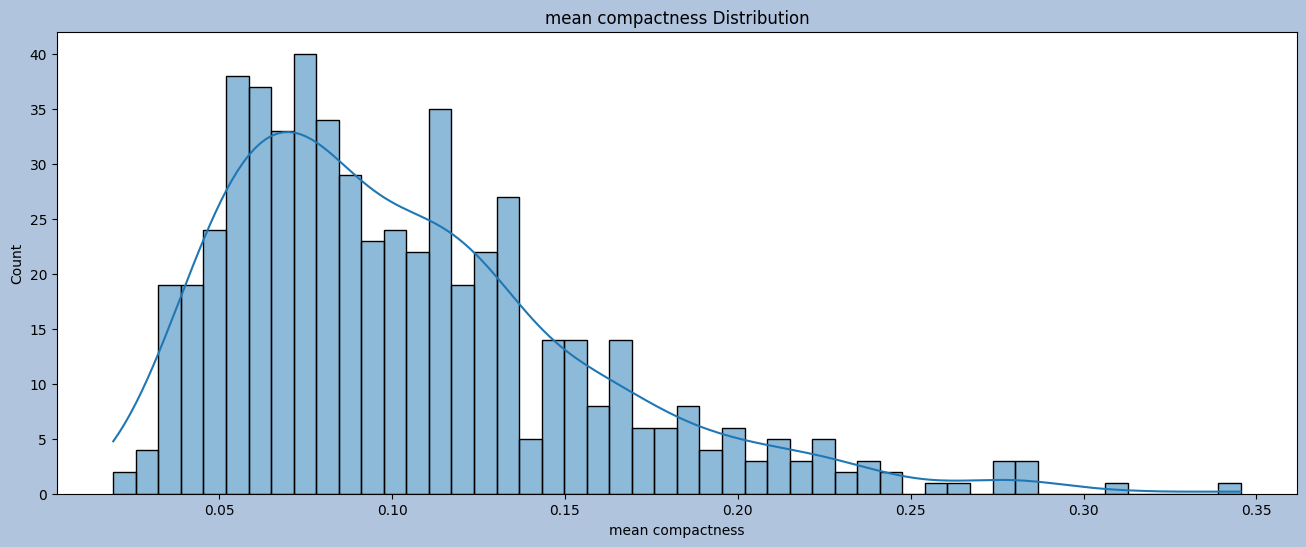

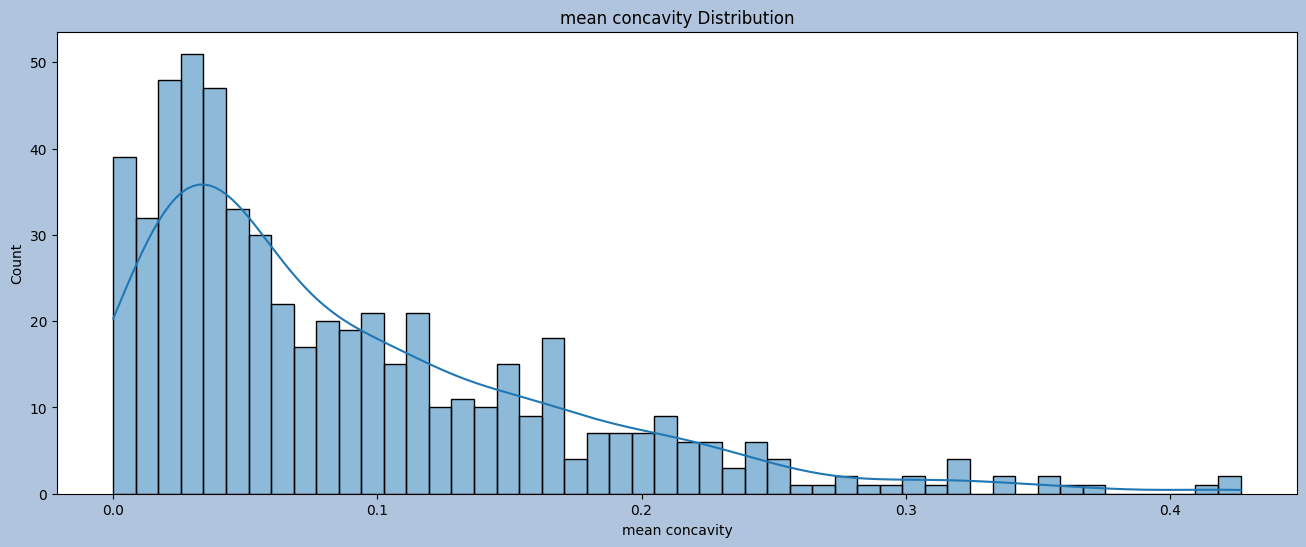

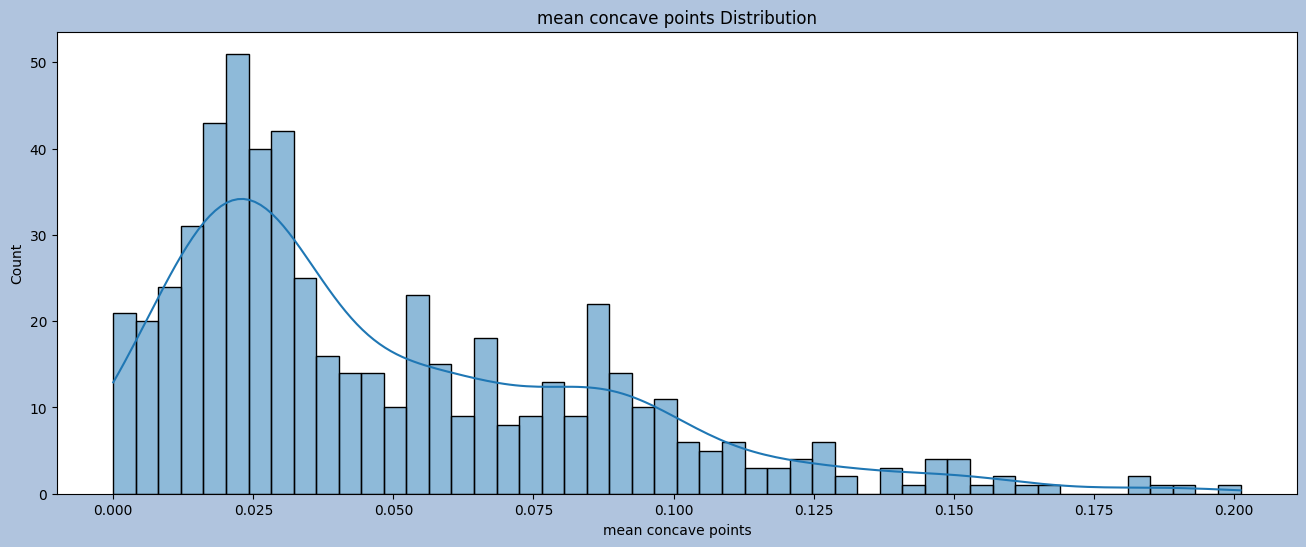

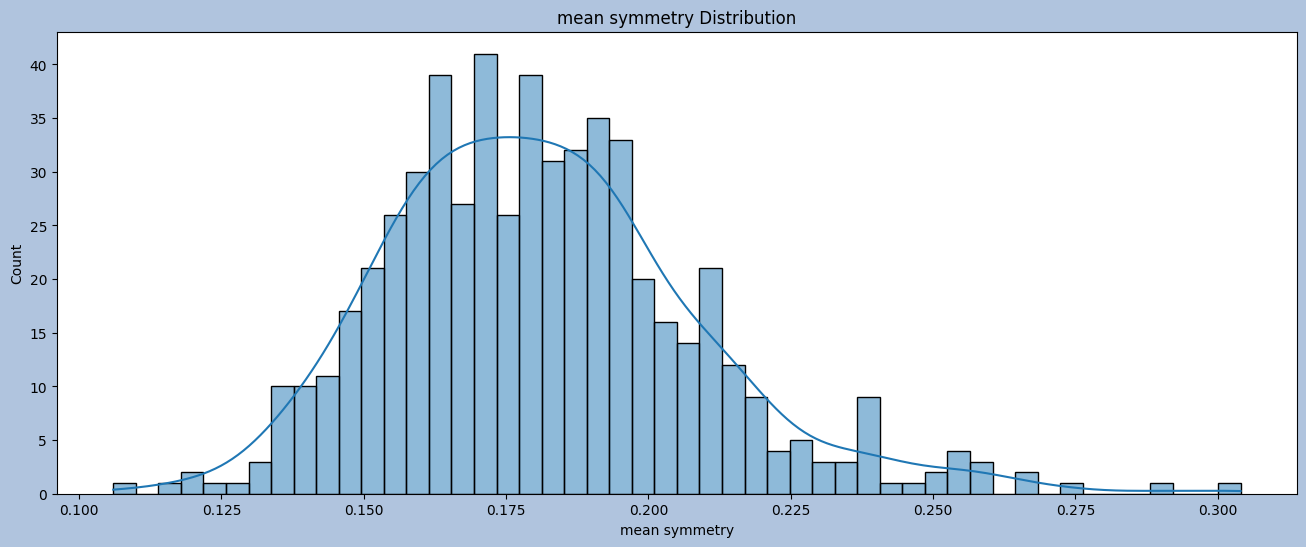

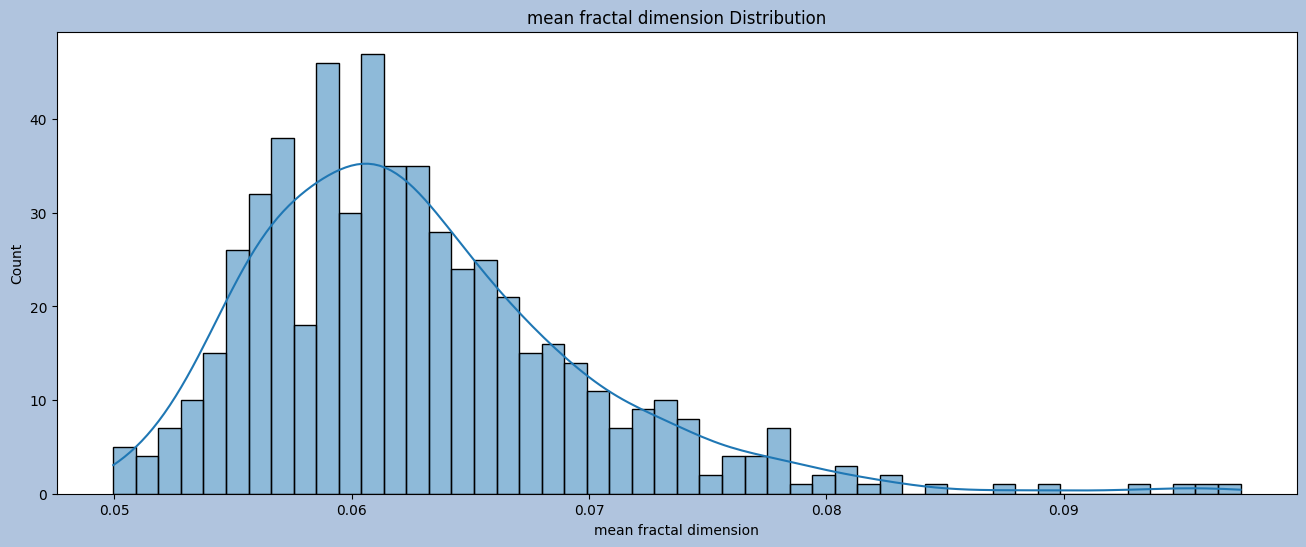

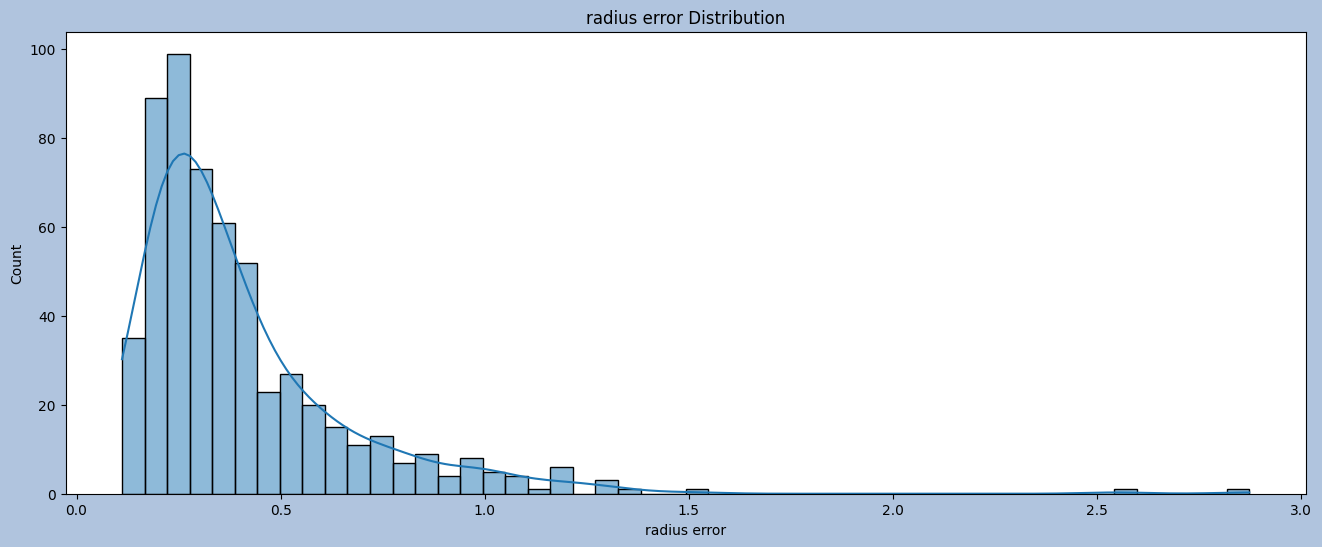

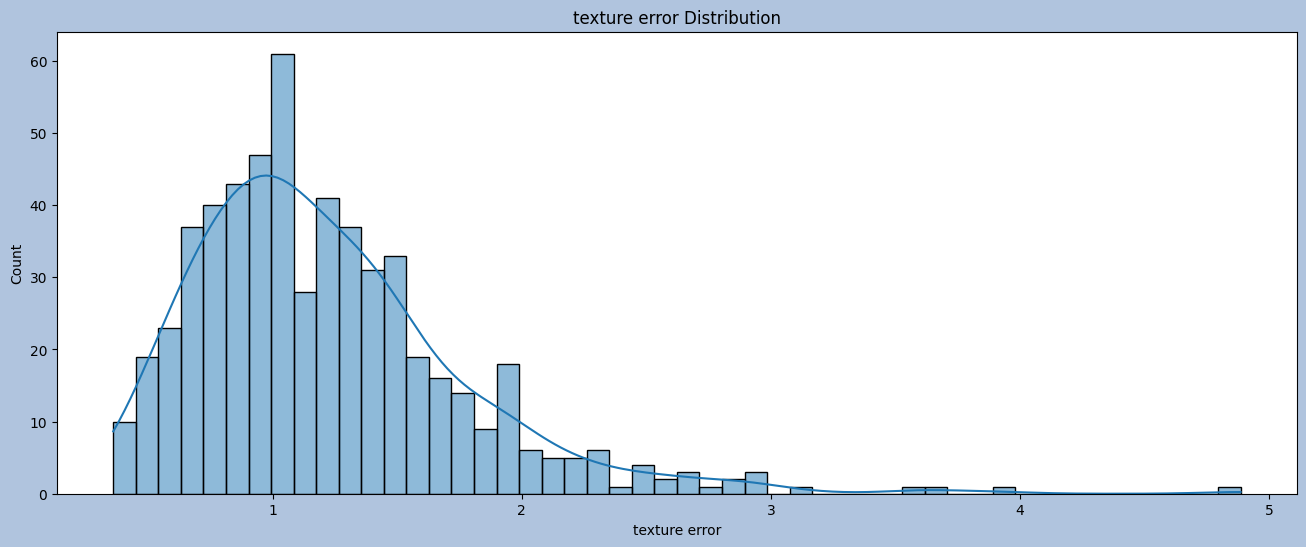

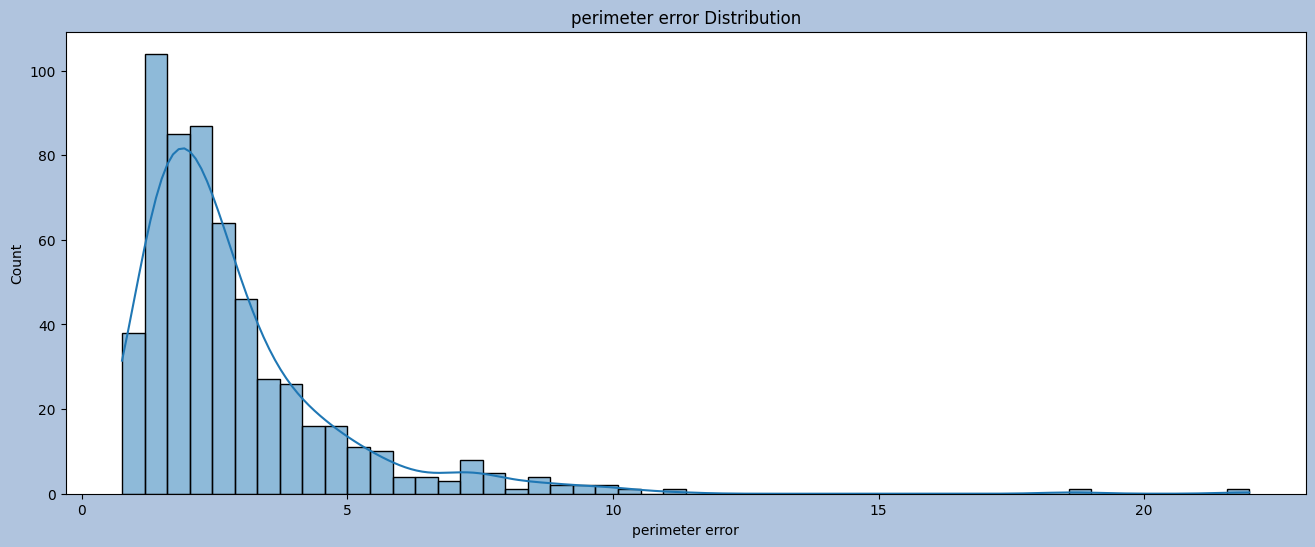

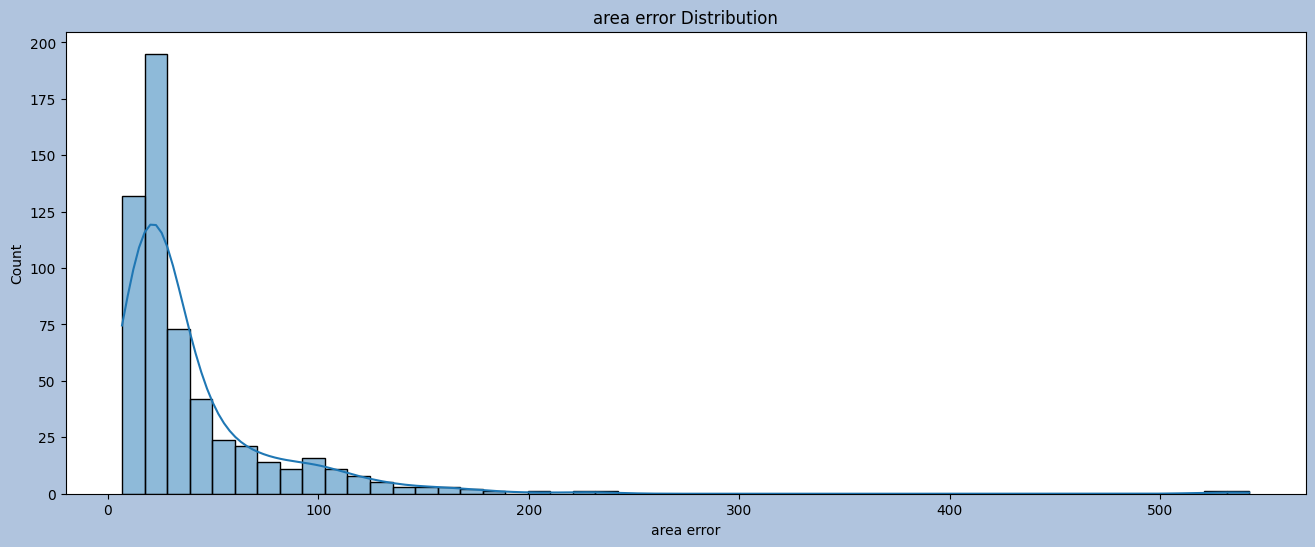

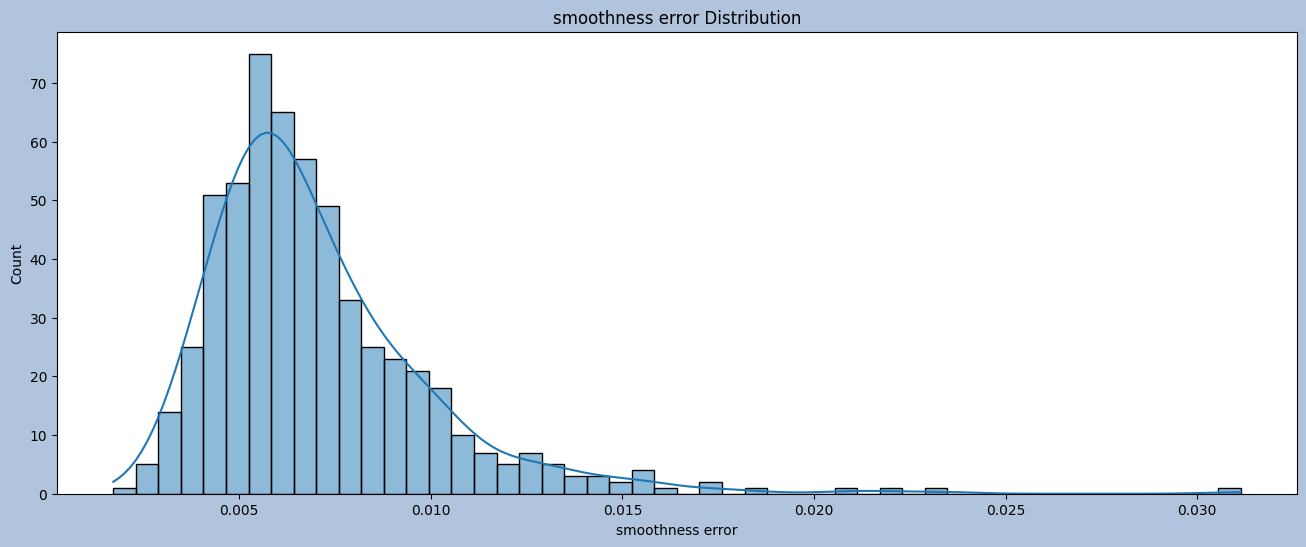

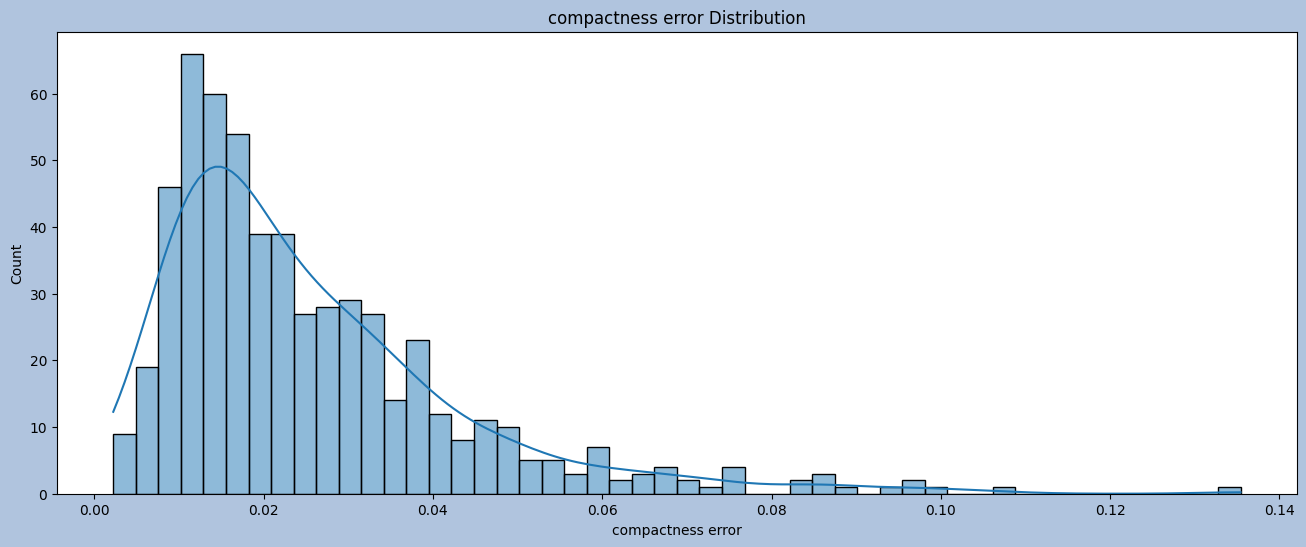

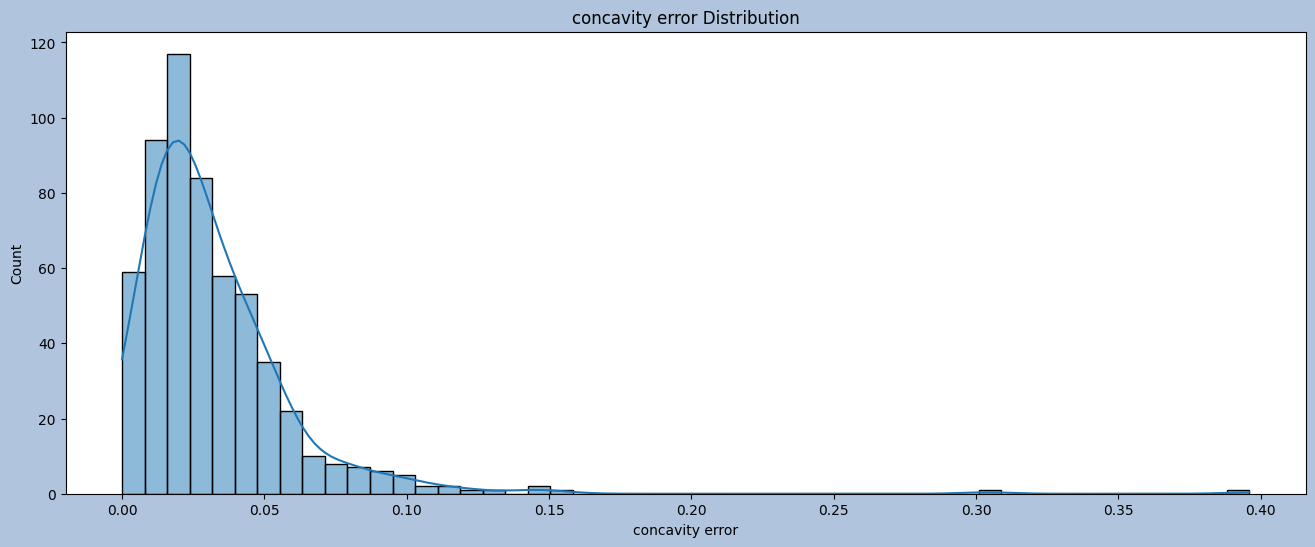

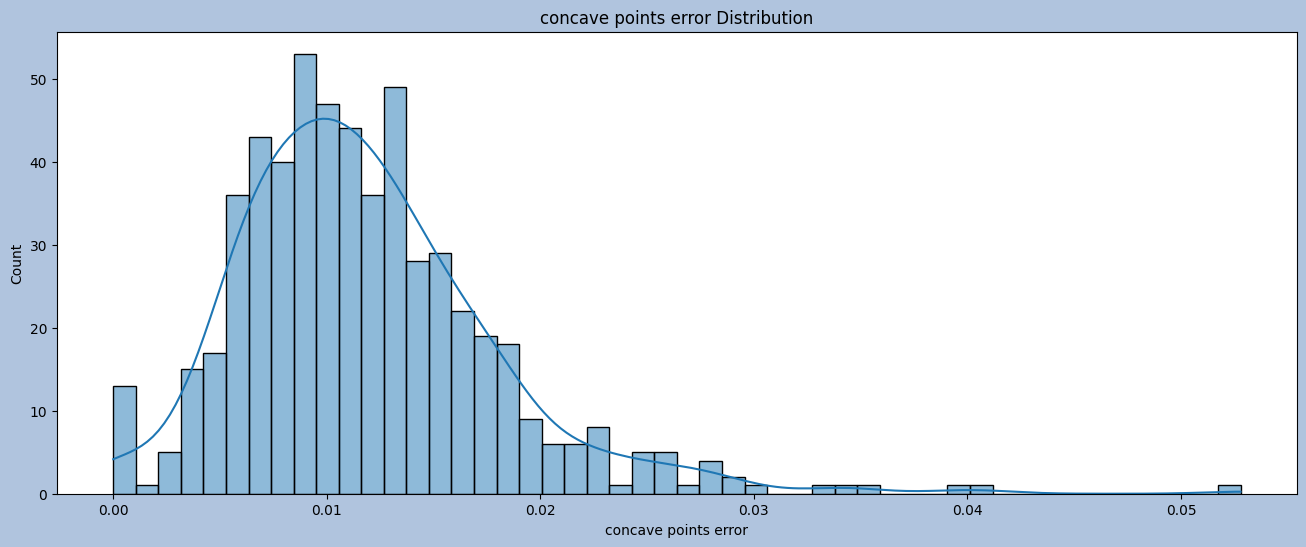

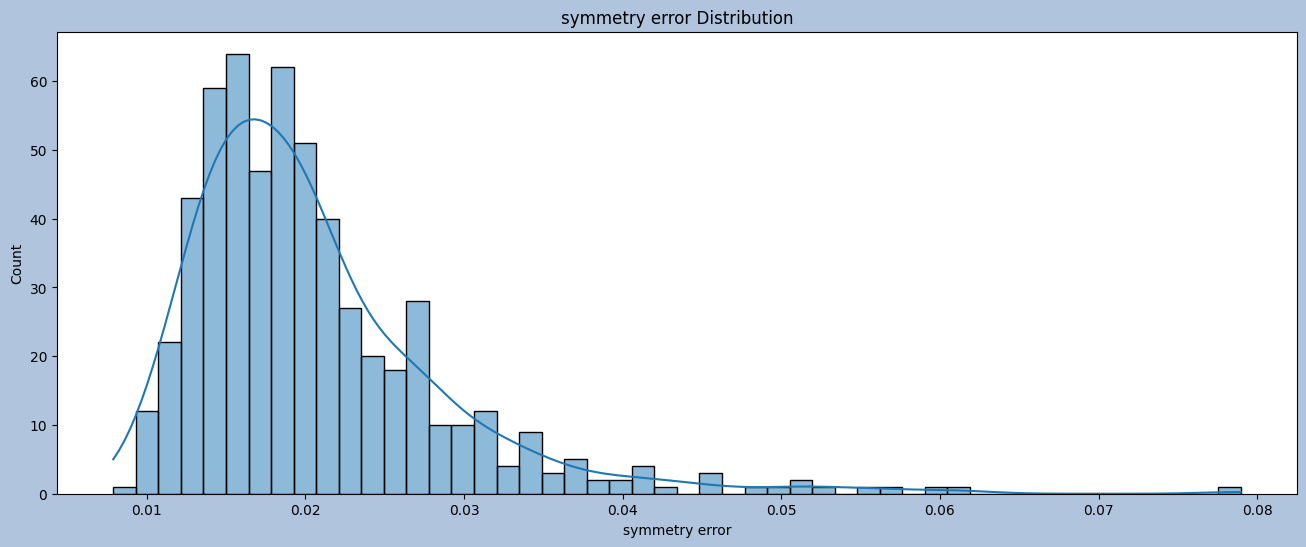

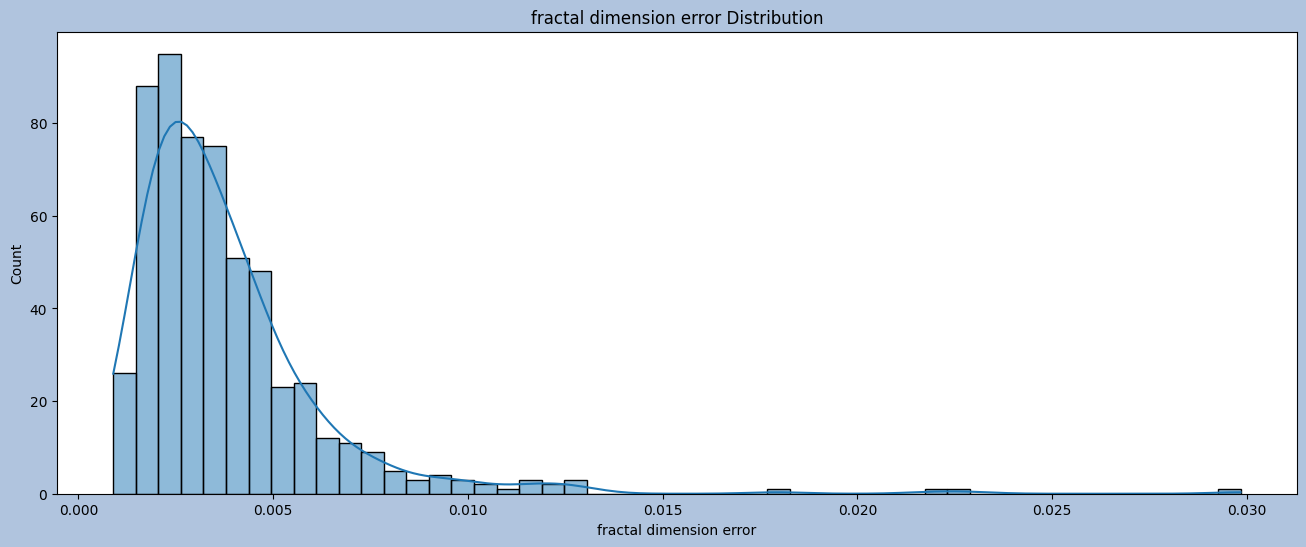

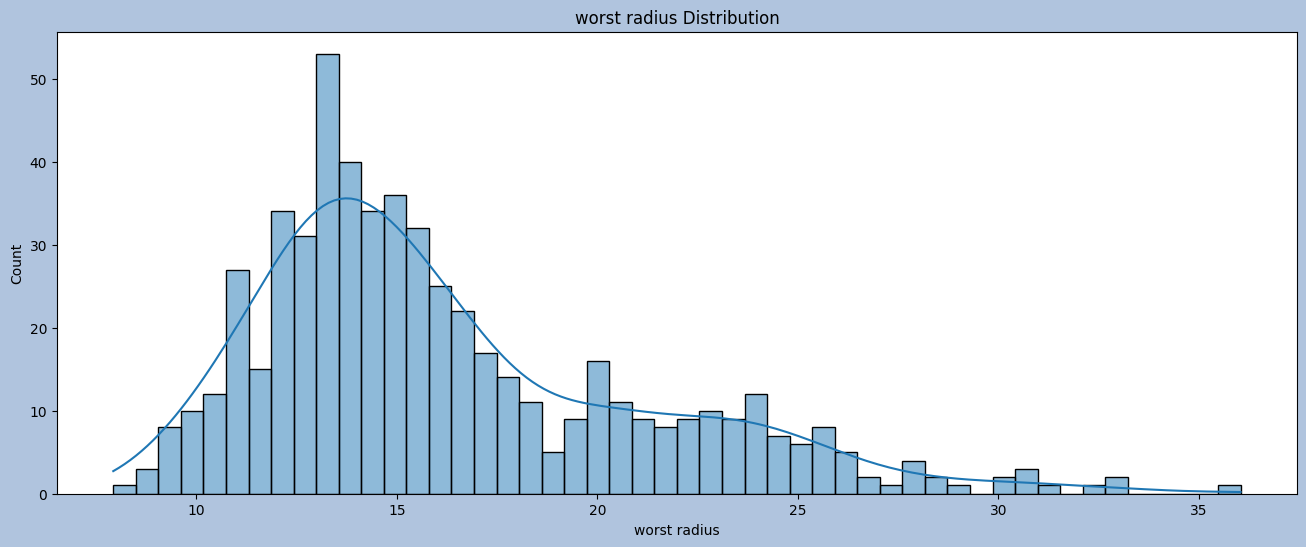

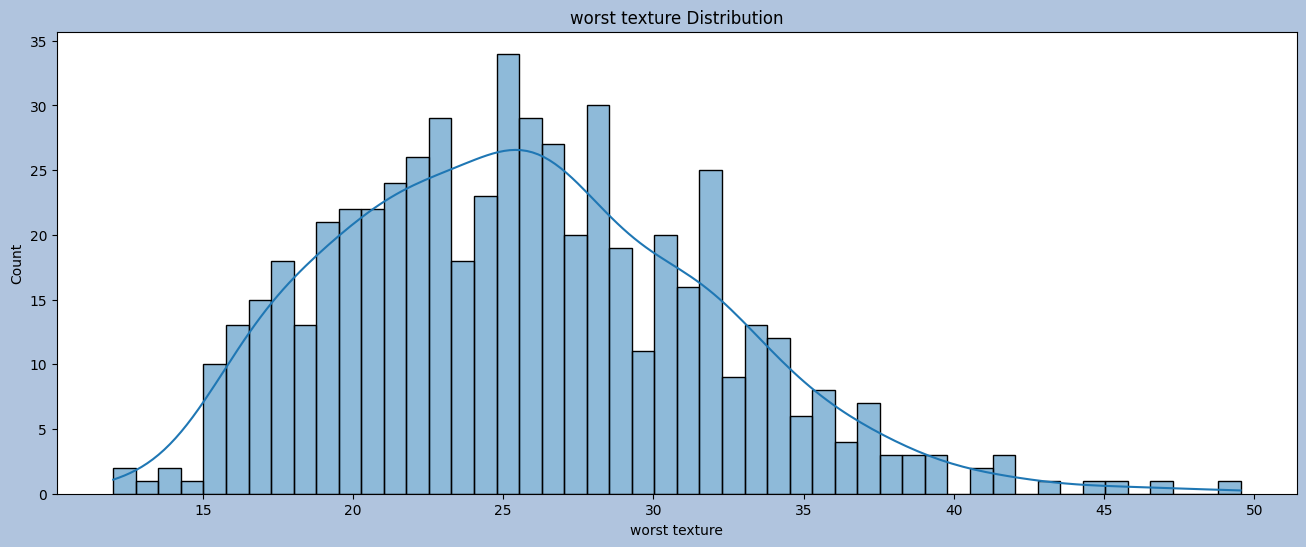

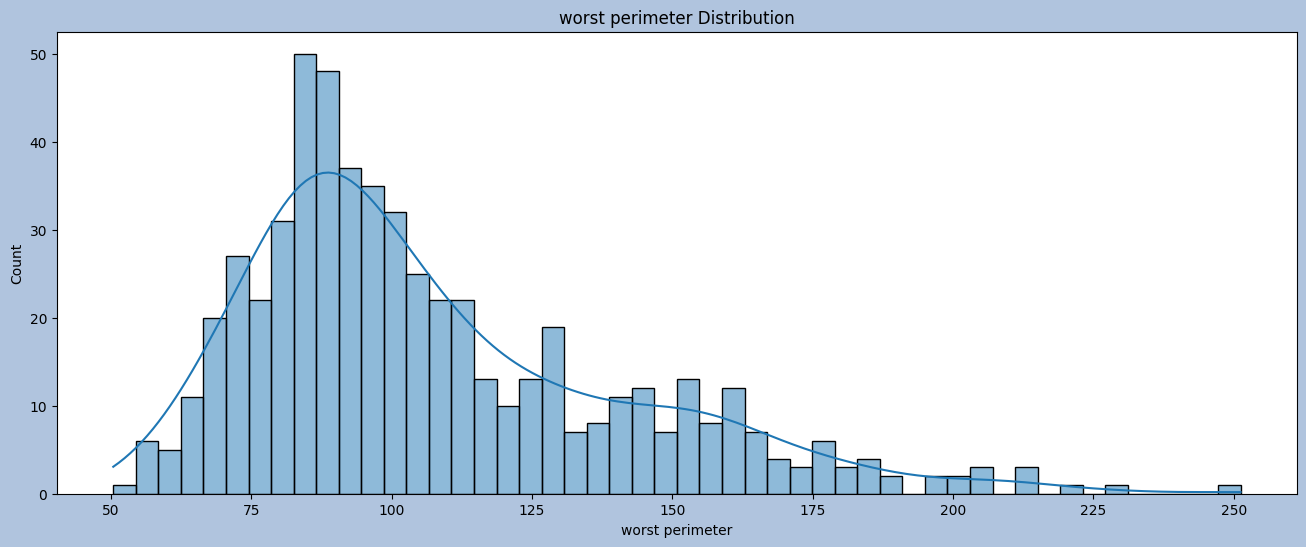

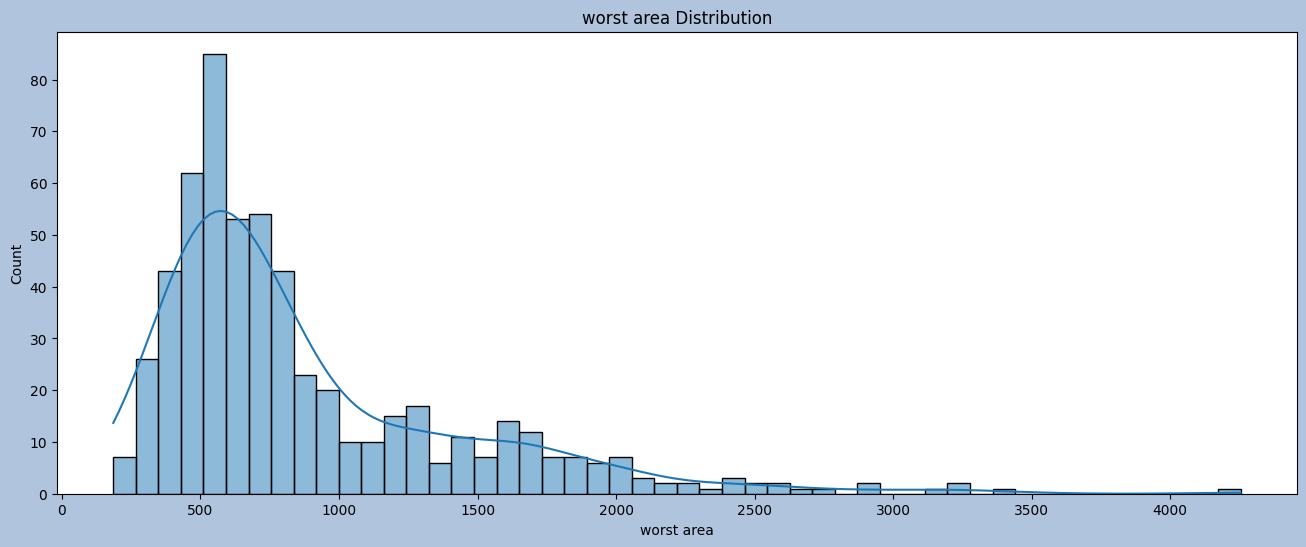

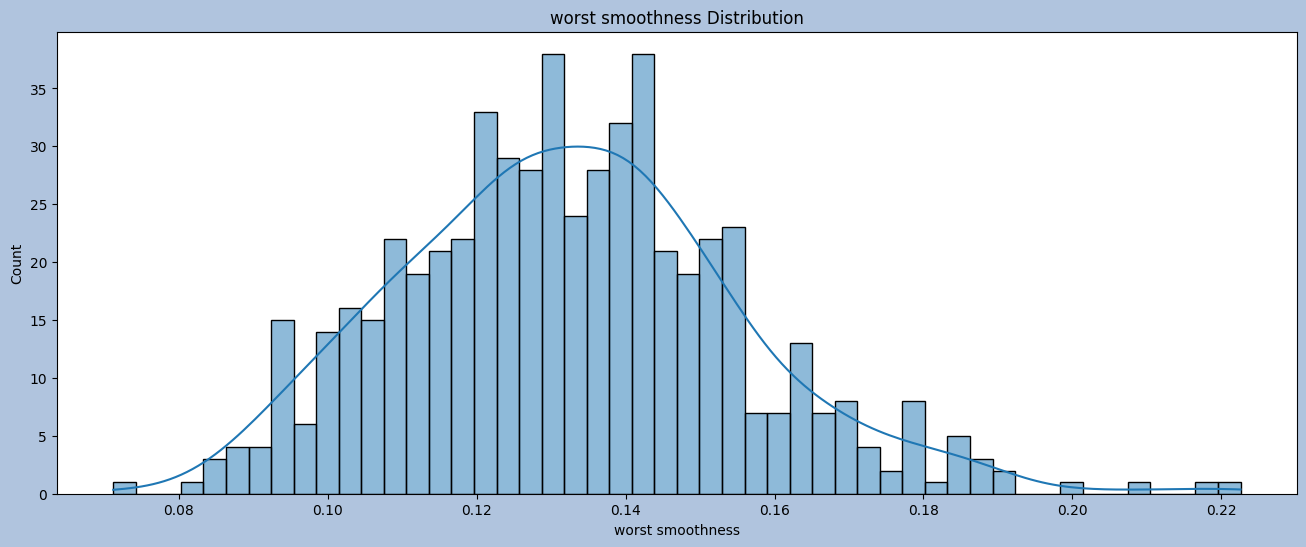

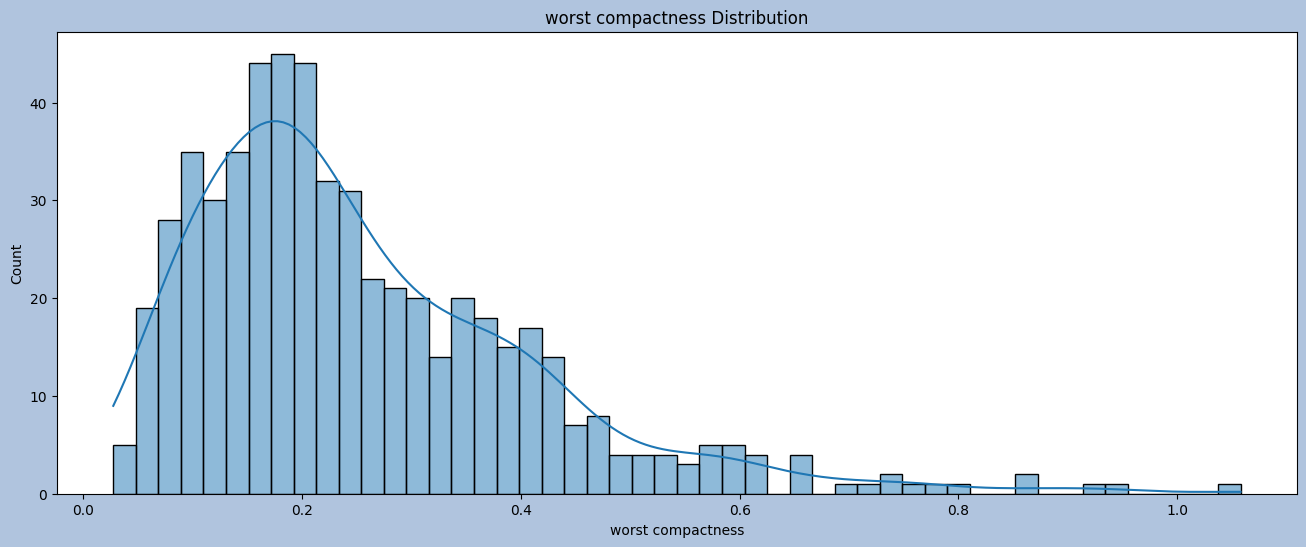

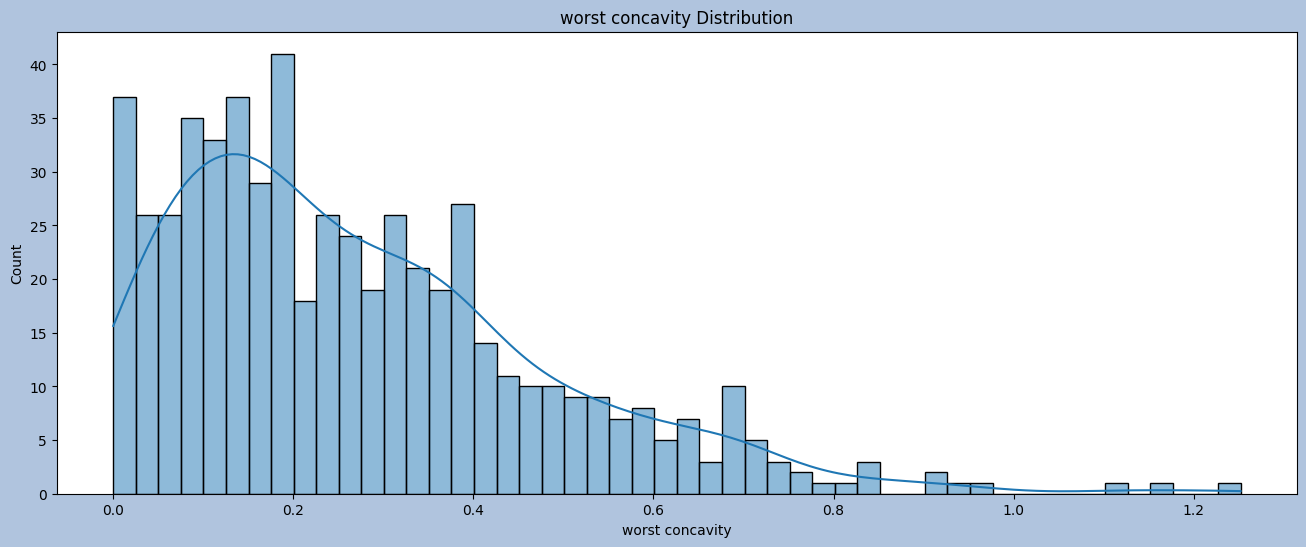

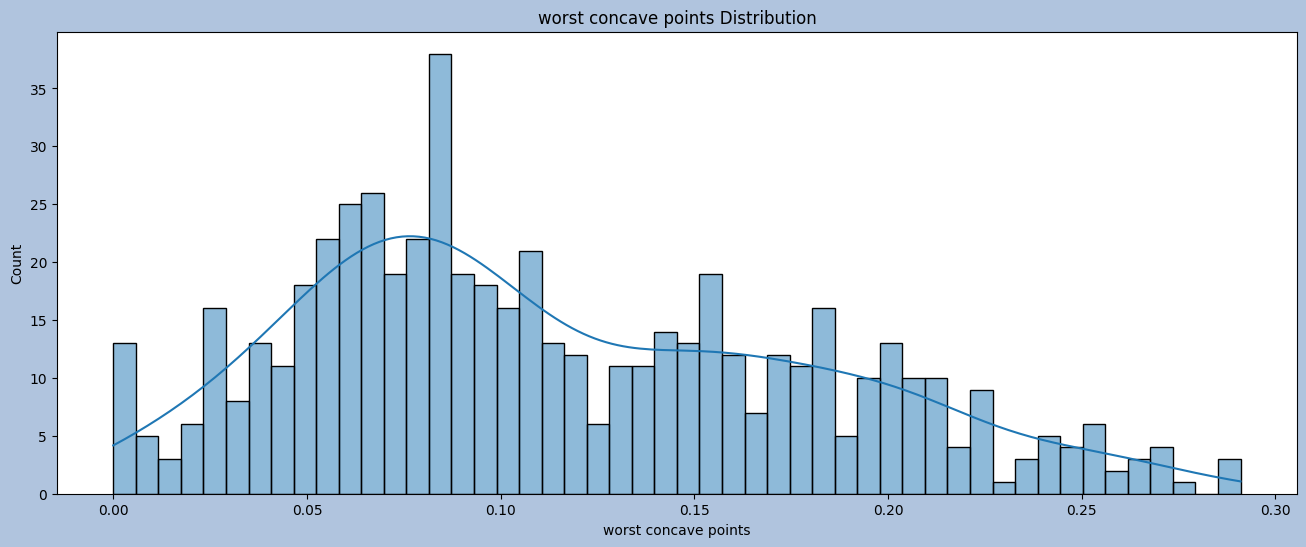

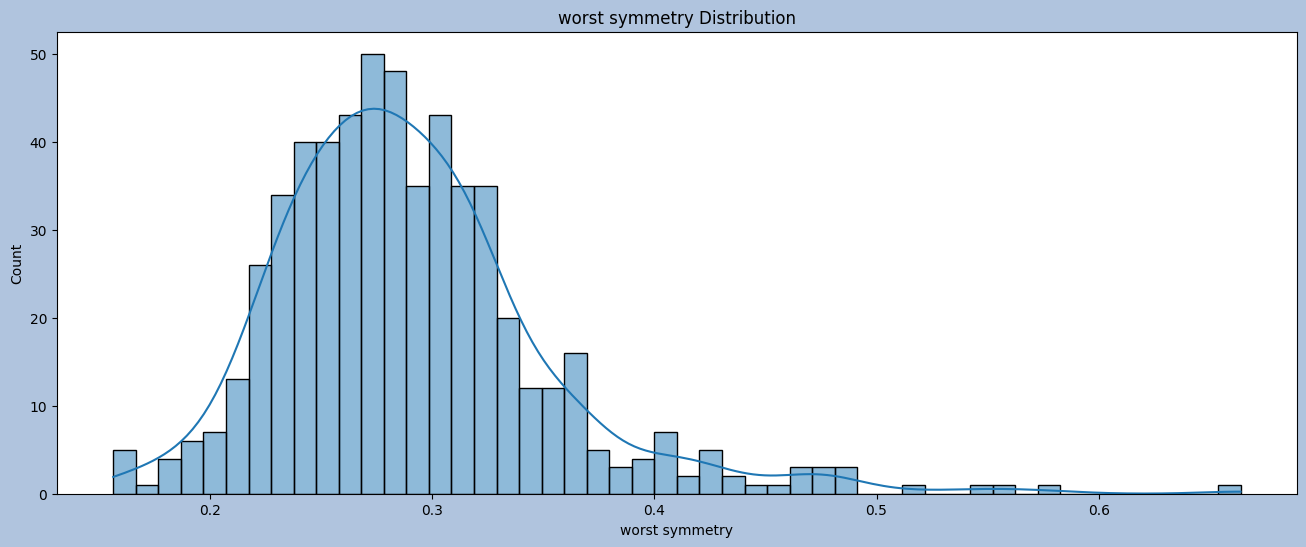

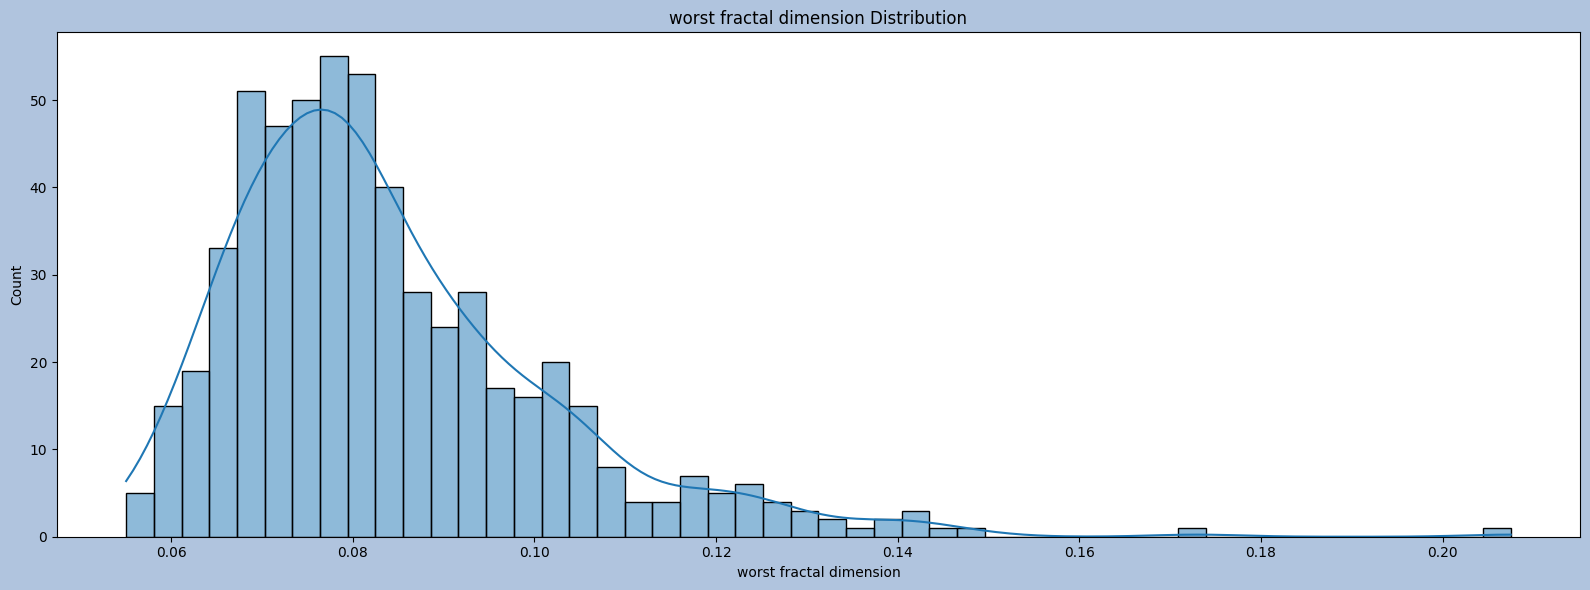

In [15]:
# Ploting each feature distribution with histplot
features = list(df.columns)[:-1]
for col in features:
  plt.figure(figsize = (16,6), facecolor = 'lightsteelblue')
  sns.histplot(df[col], kde= True, bins= 50)
  plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

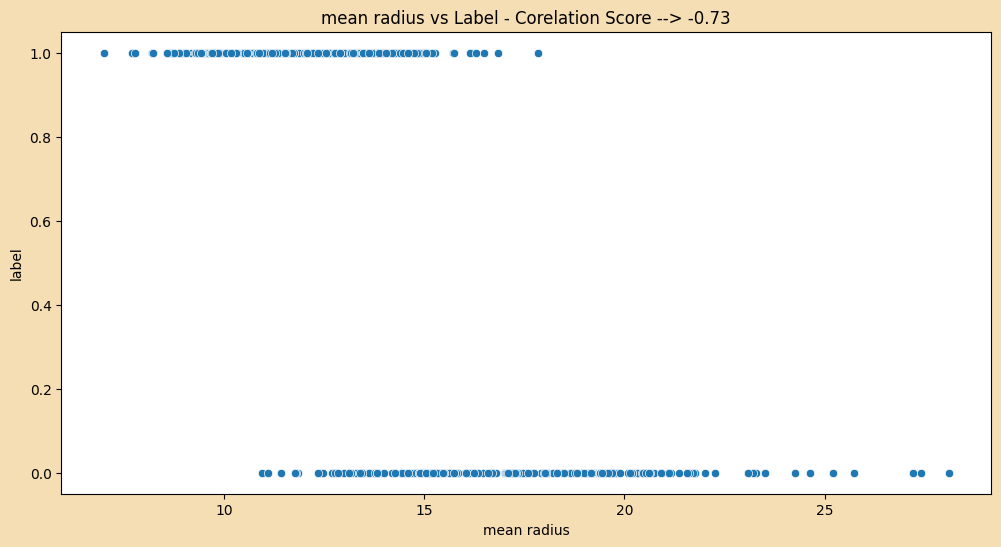

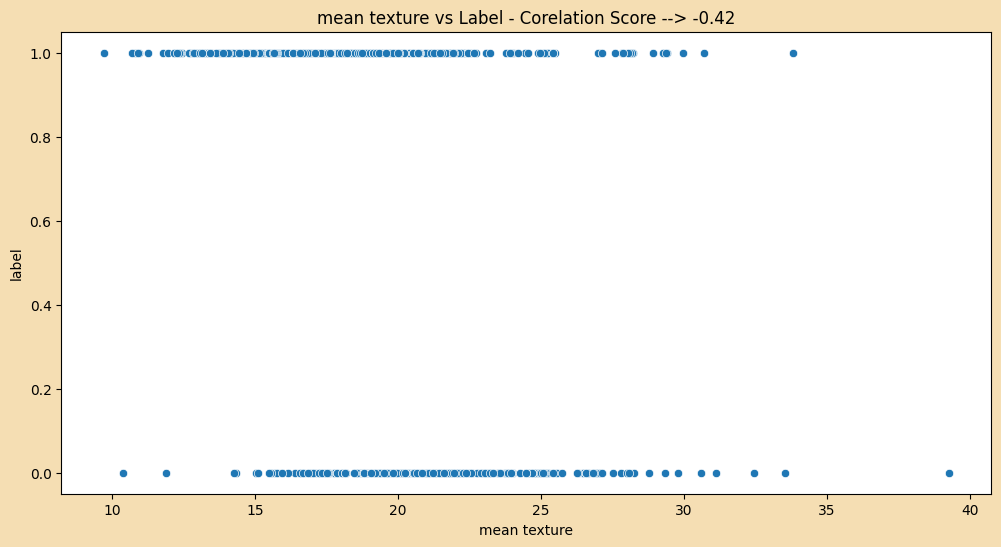

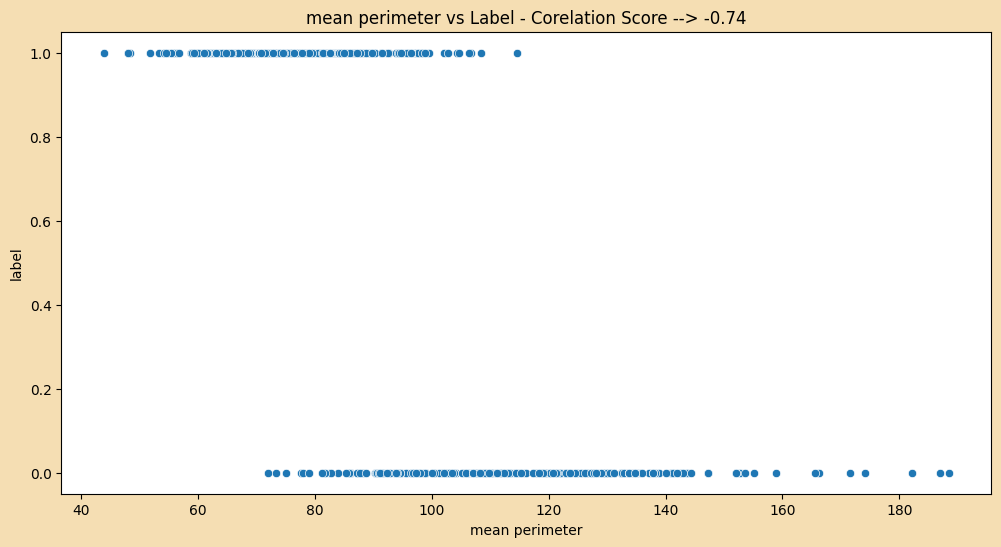

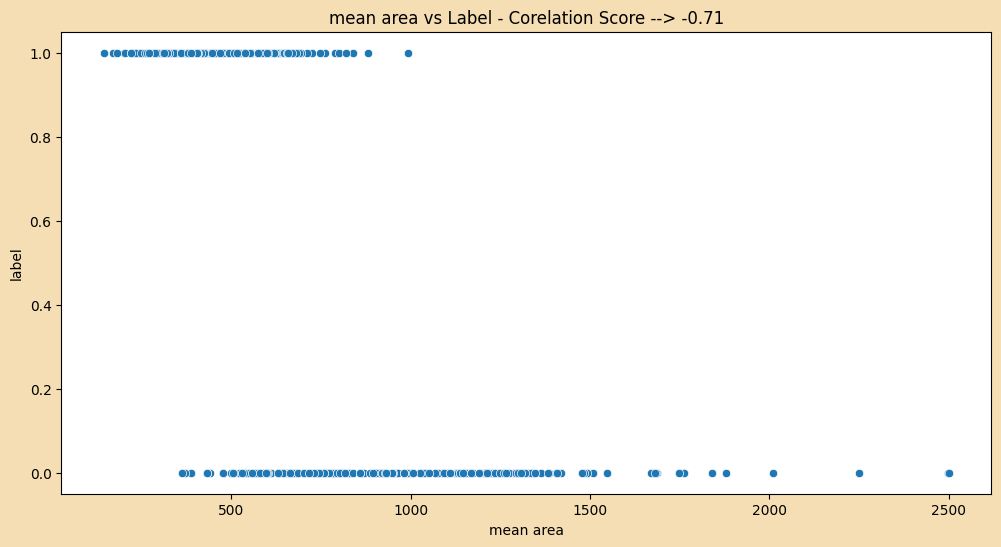

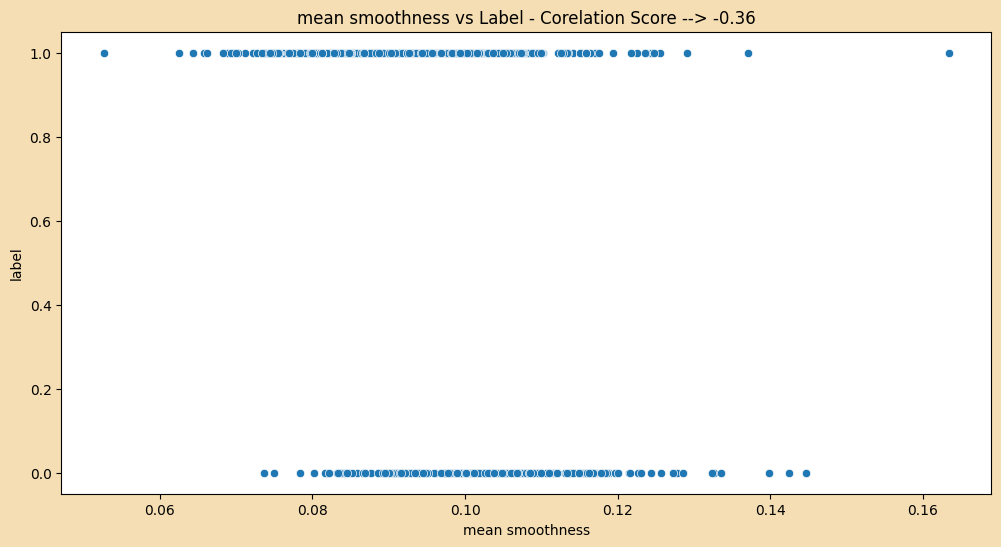

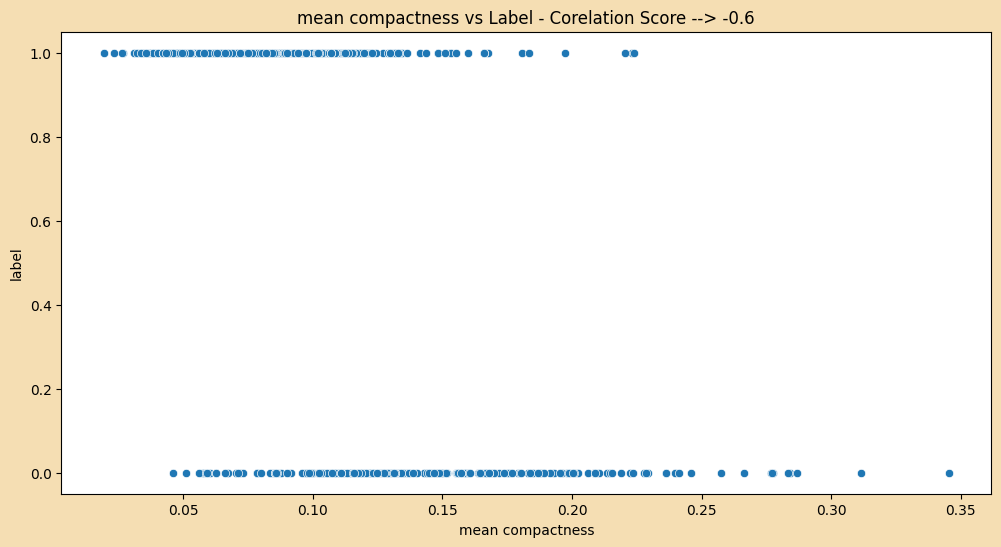

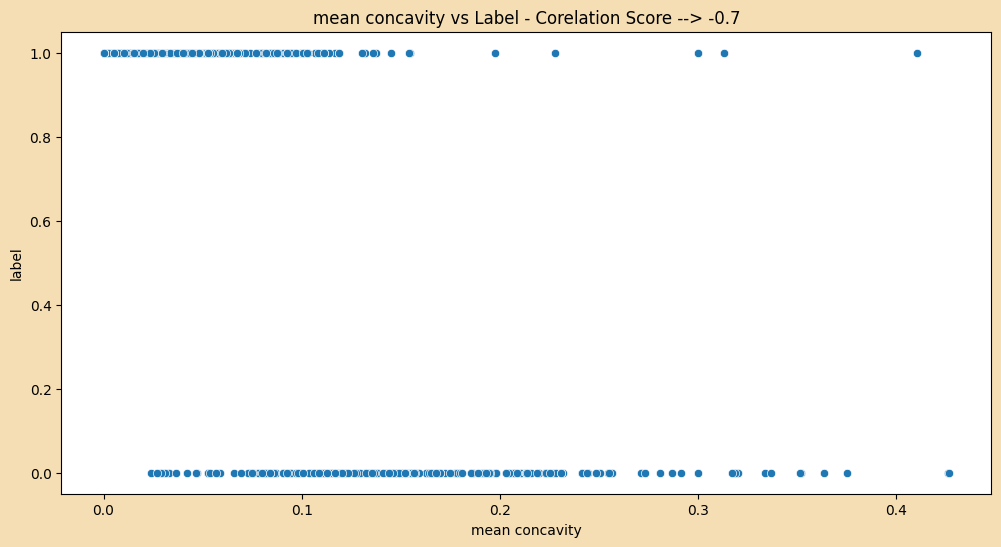

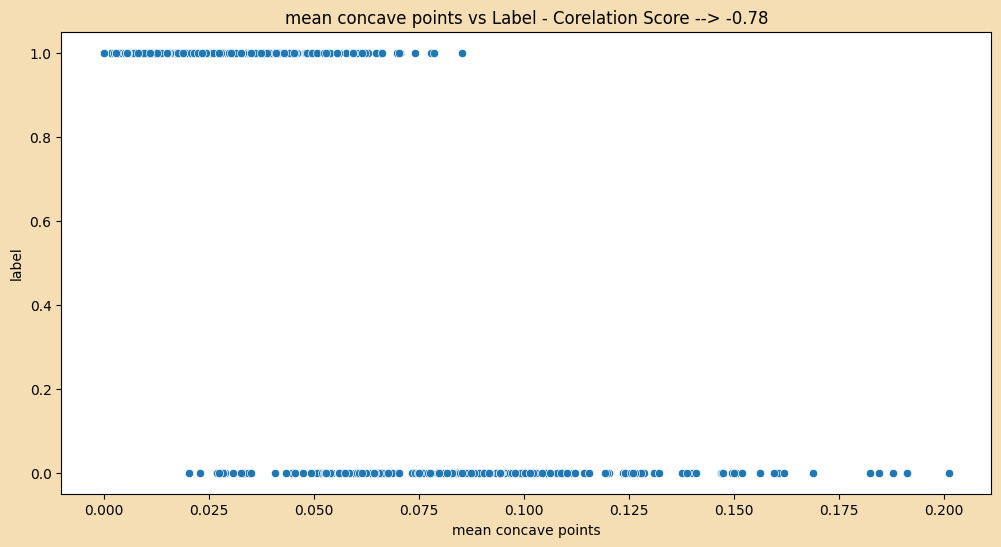

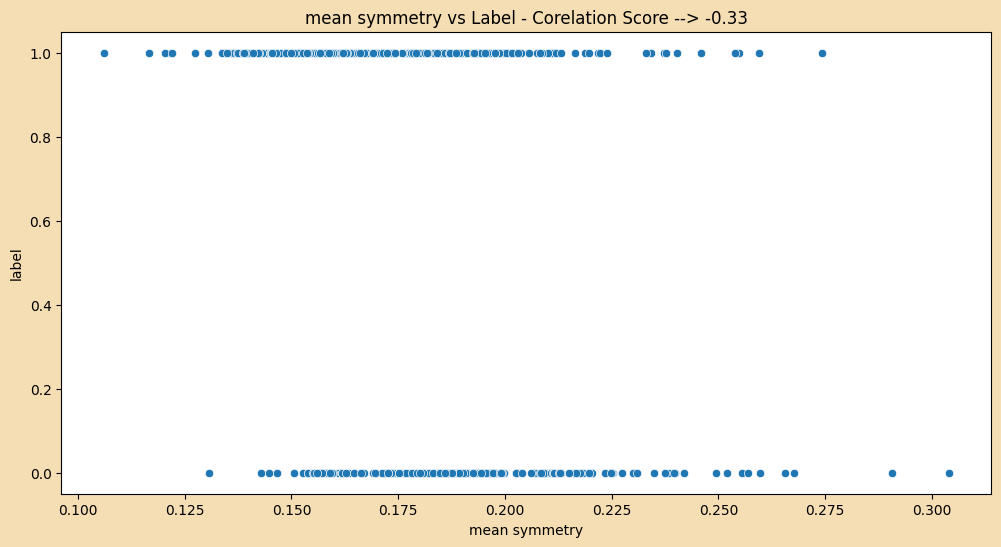

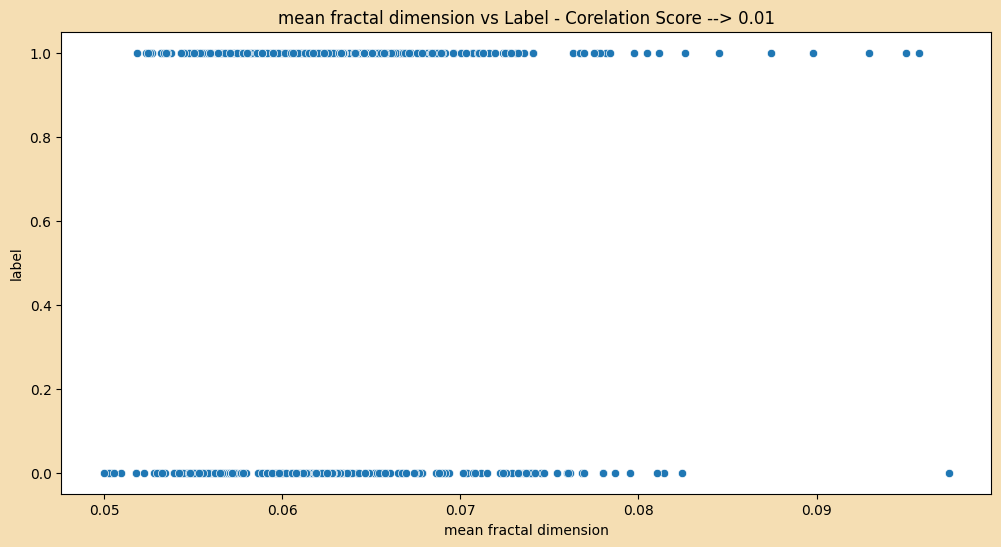

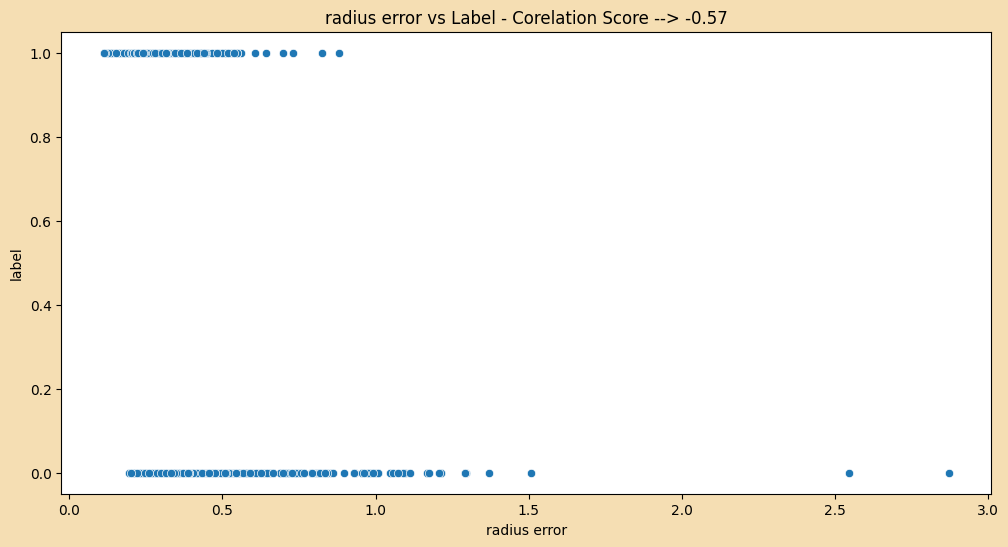

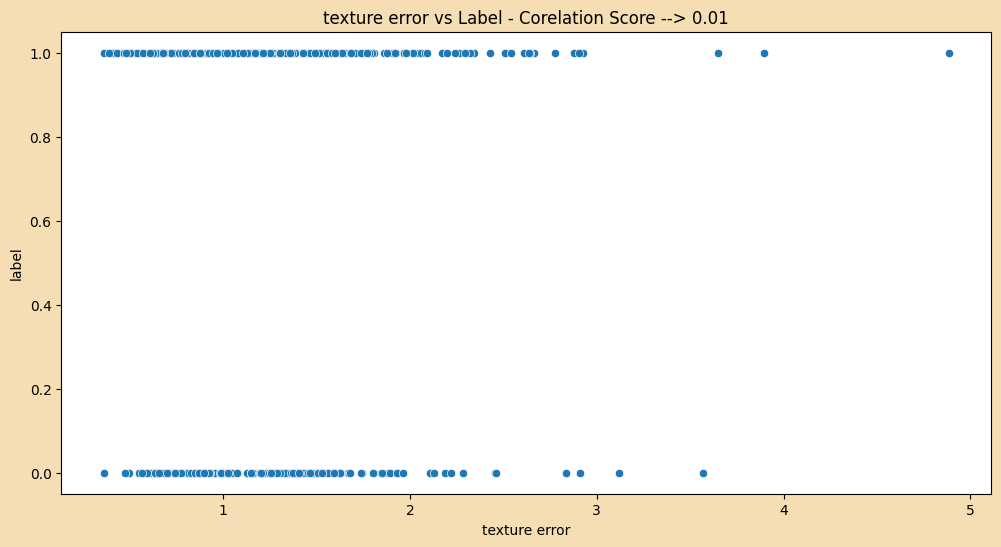

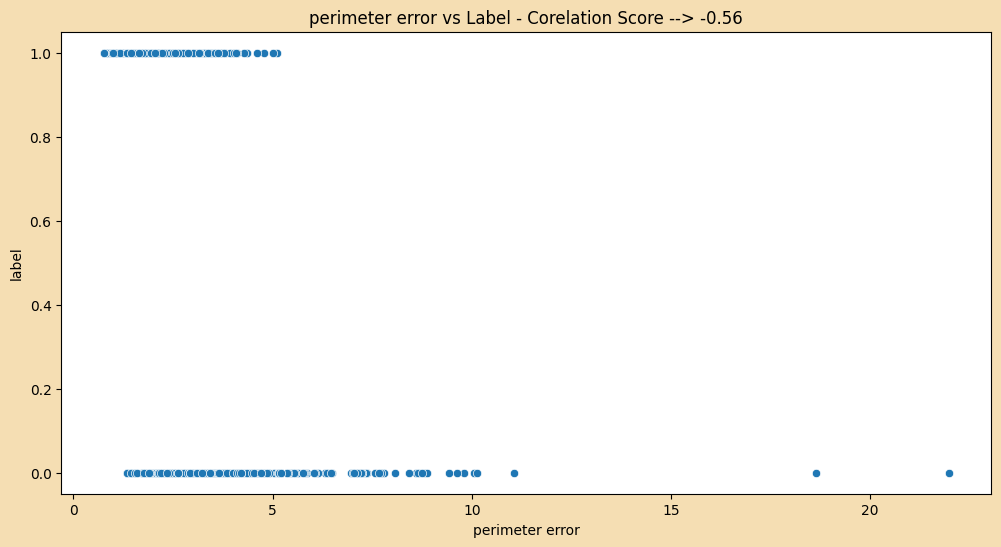

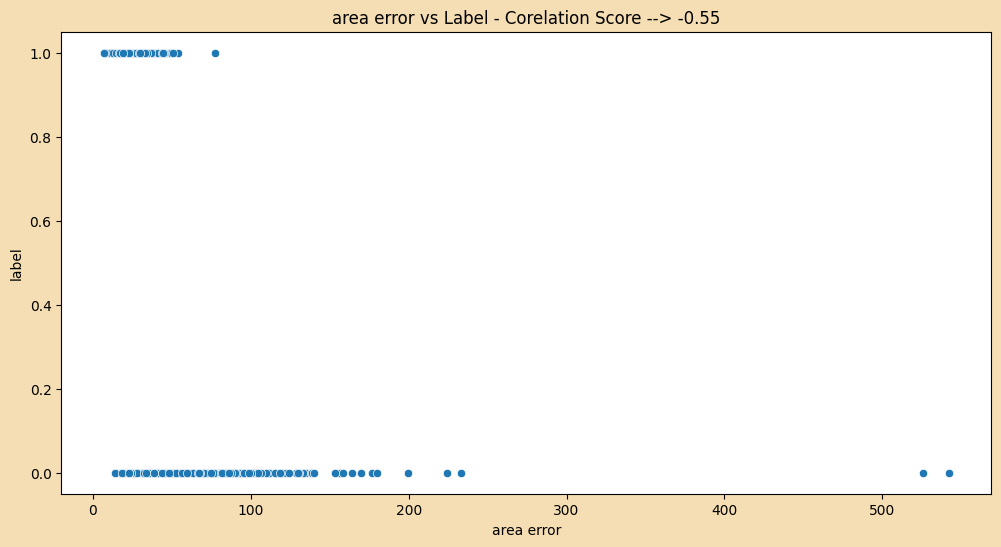

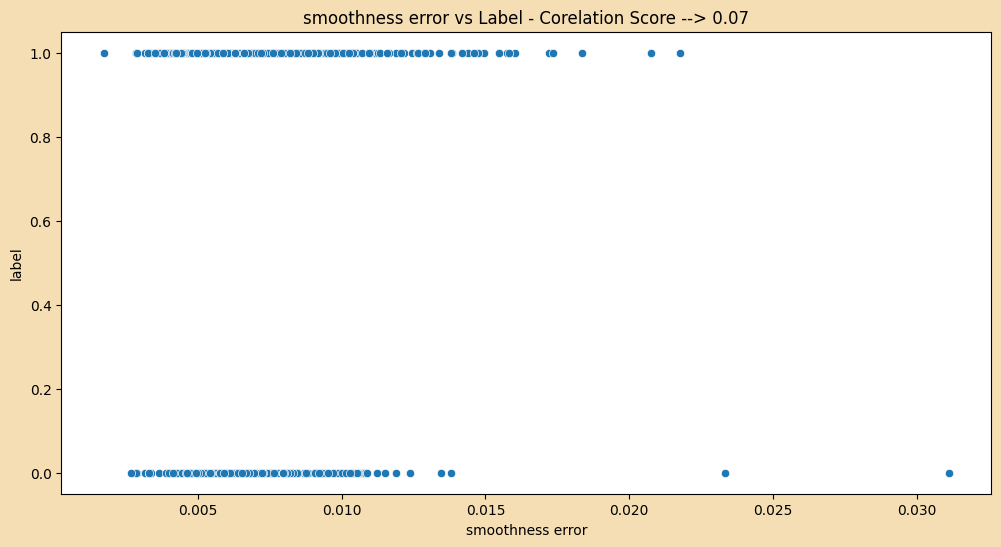

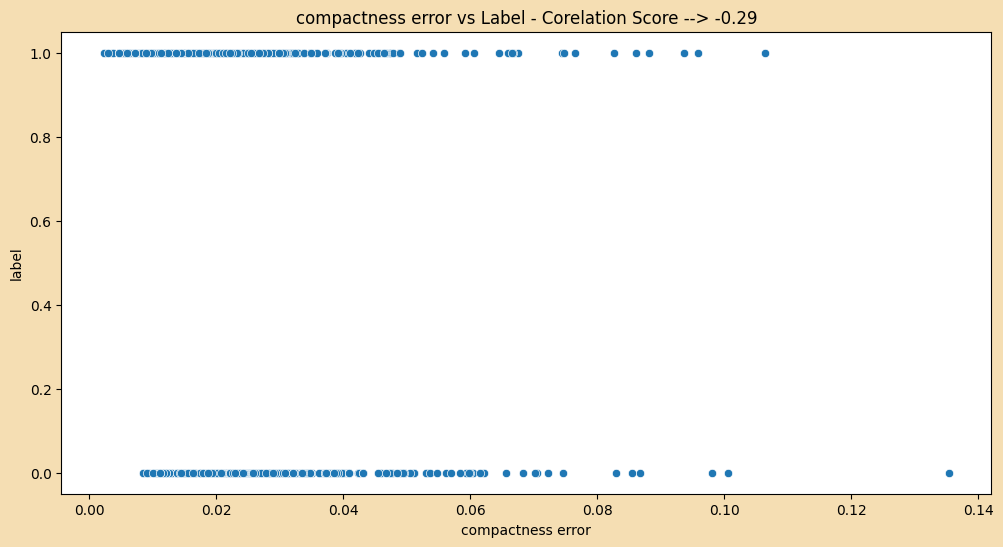

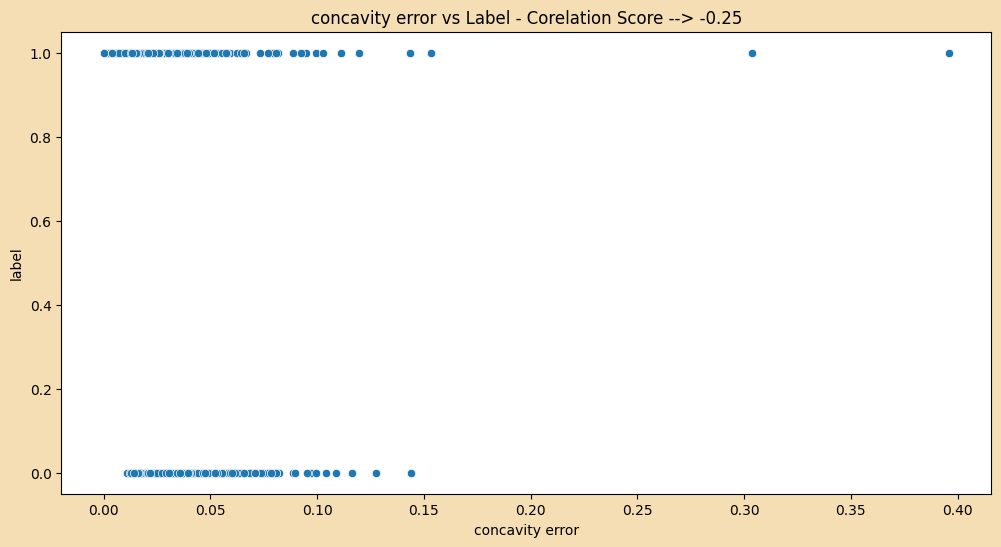

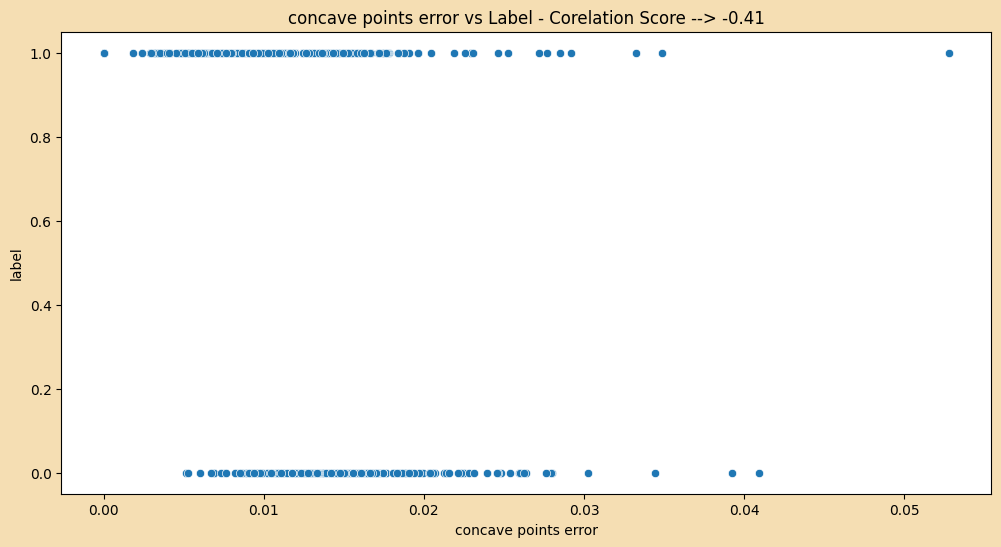

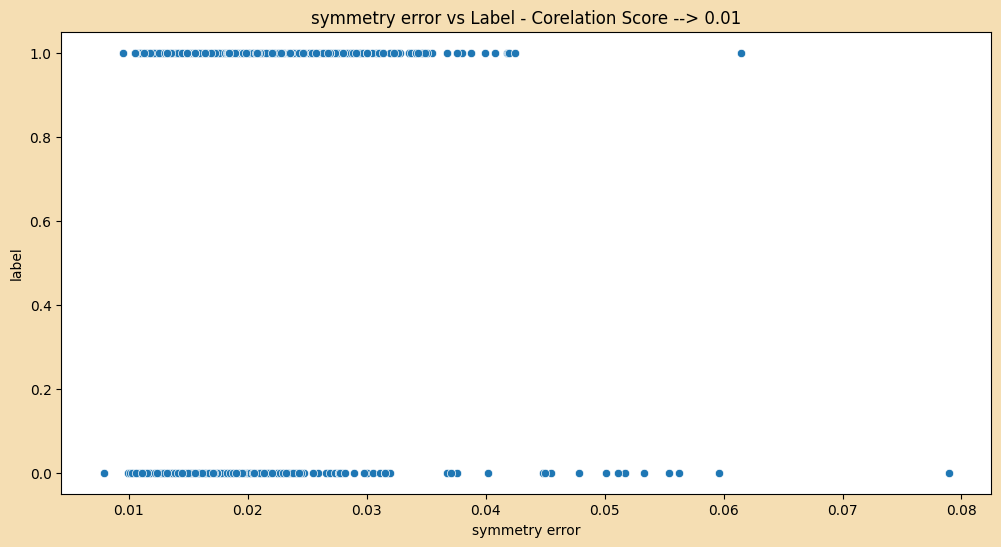

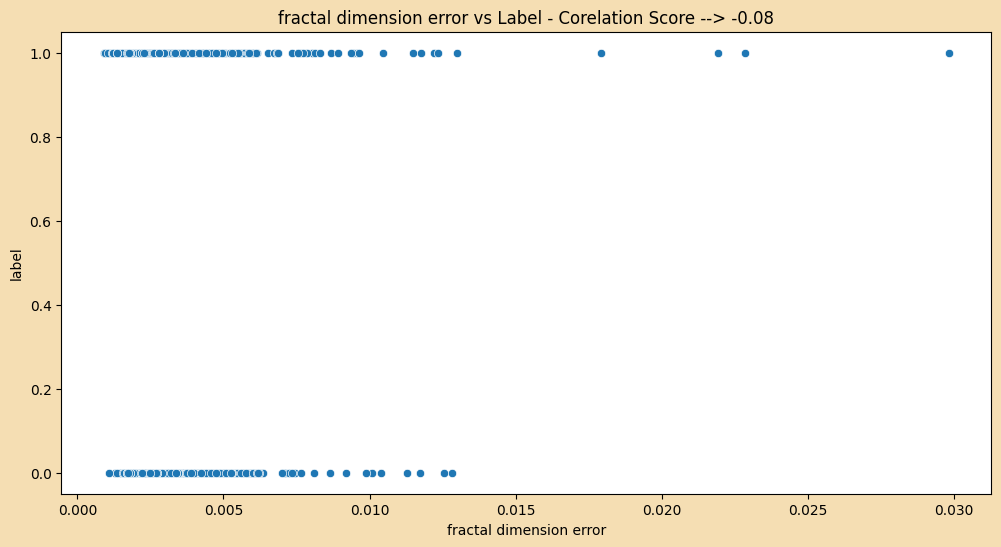

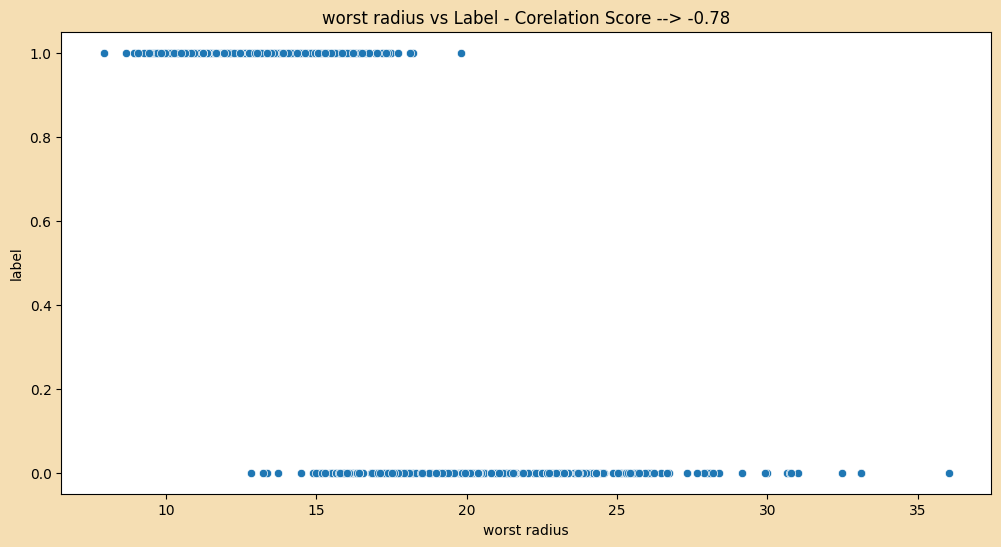

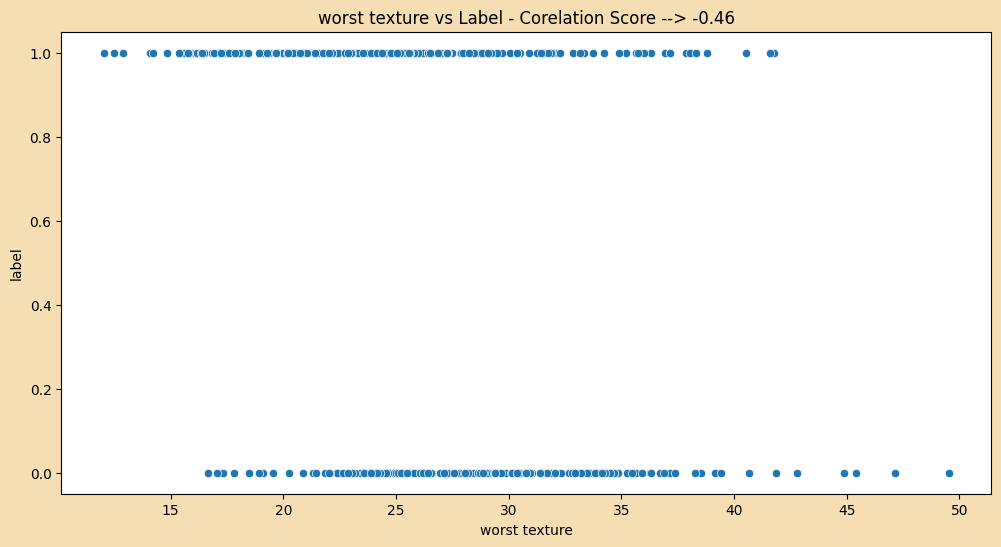

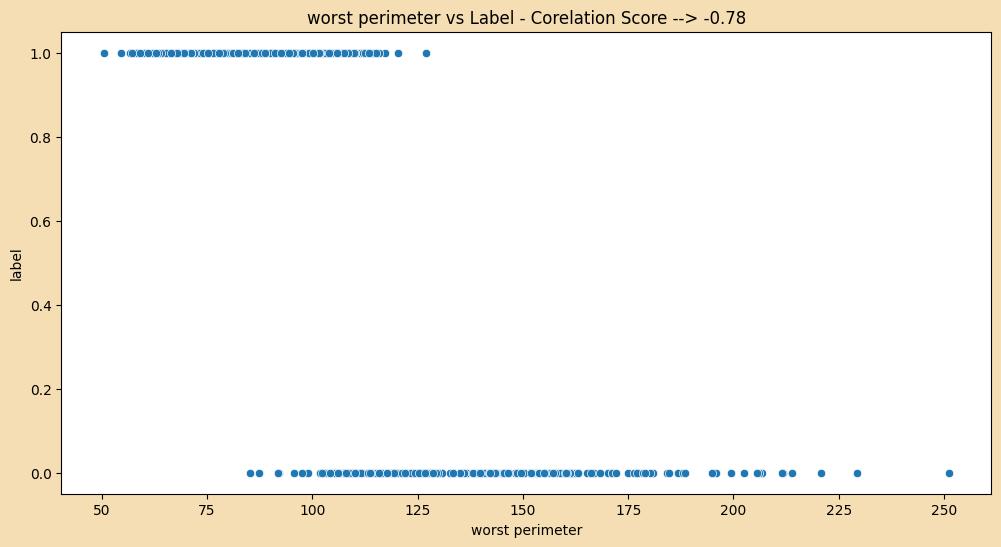

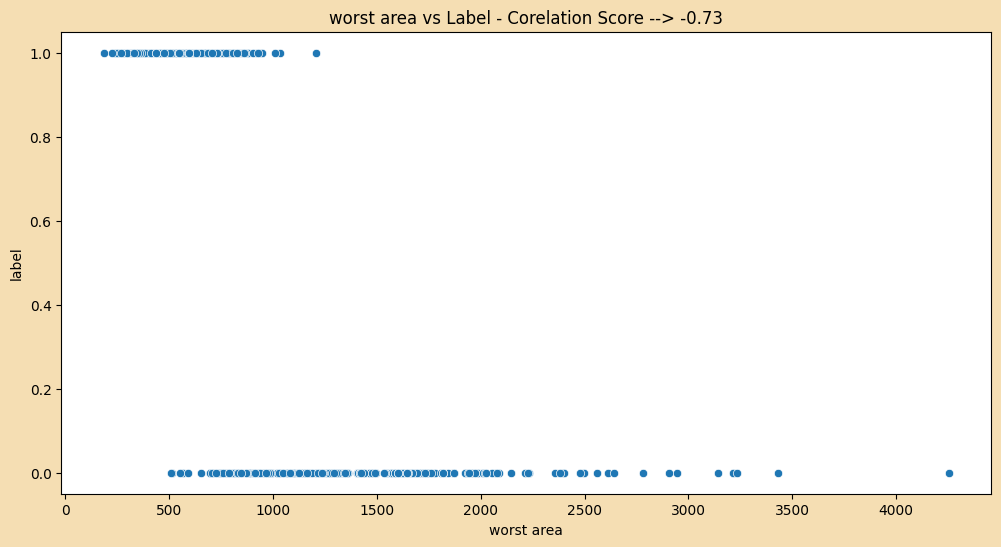

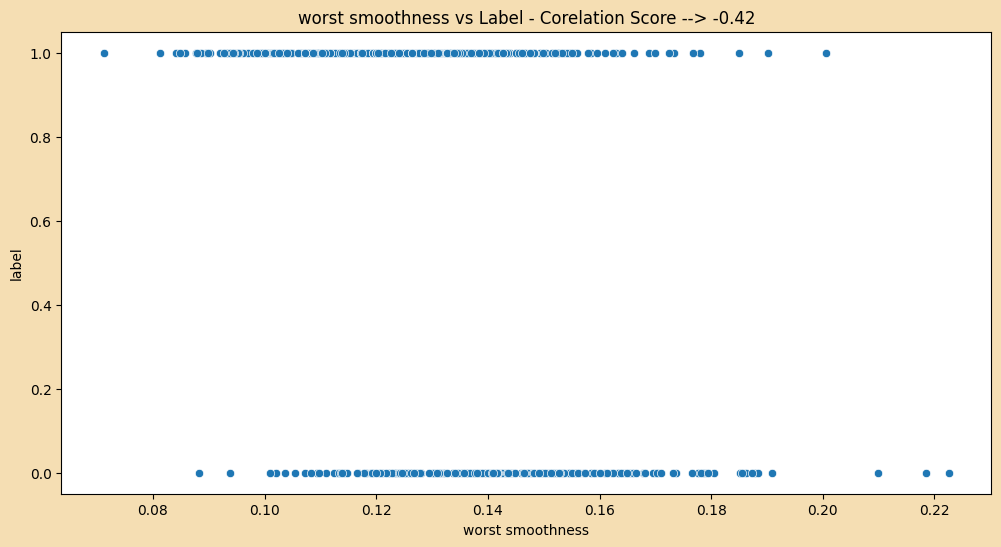

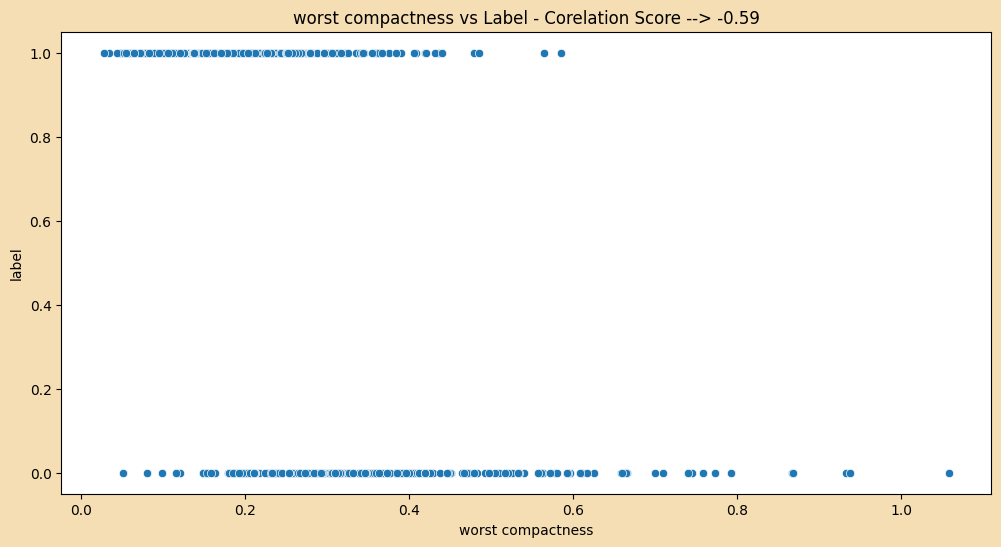

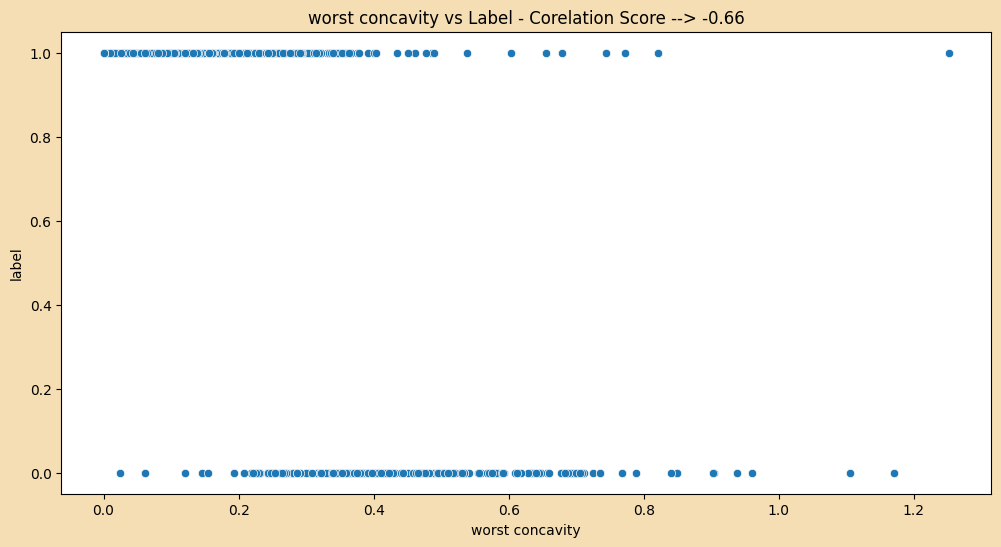

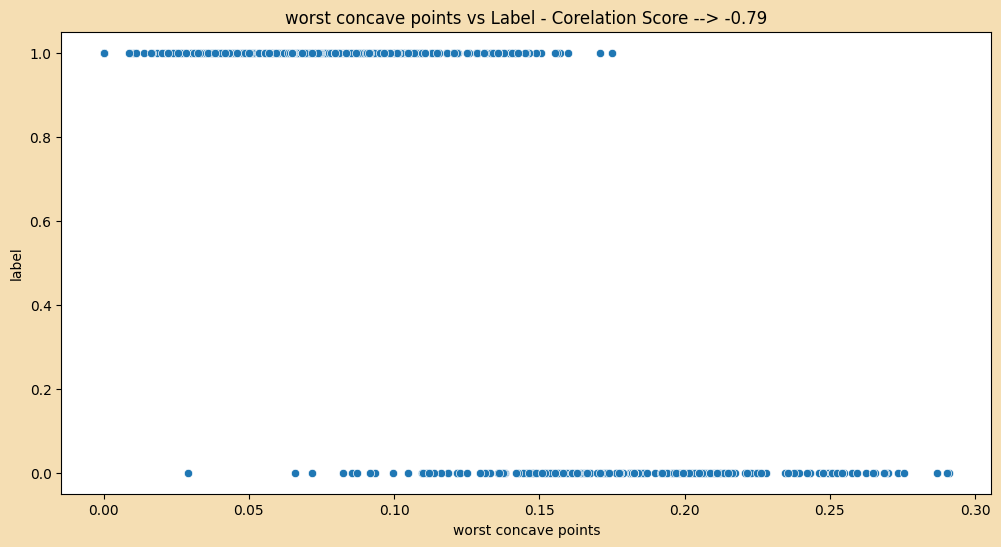

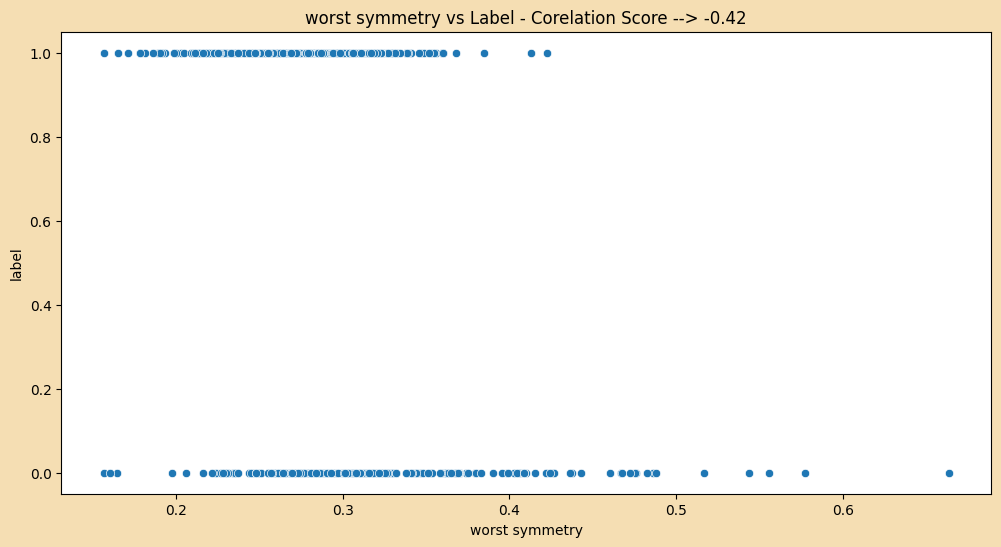

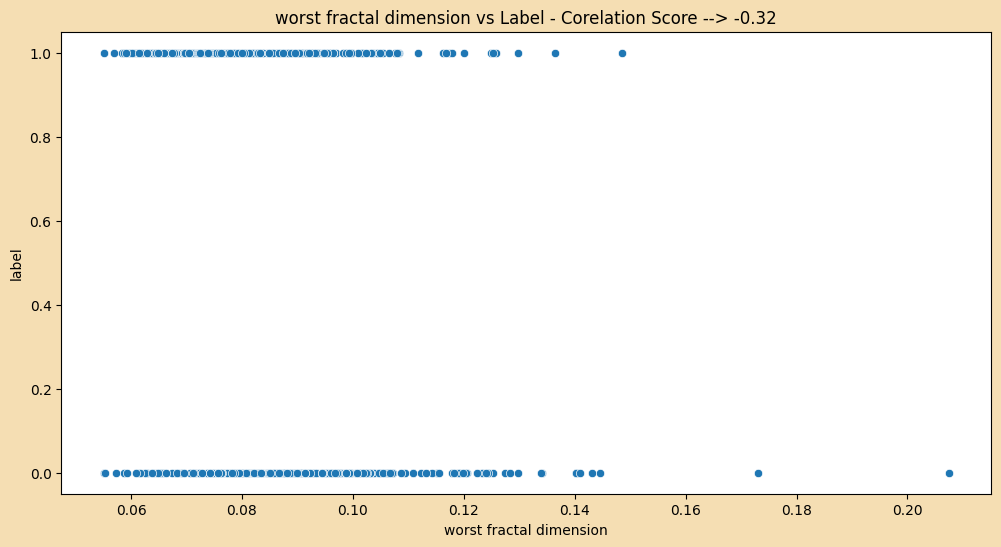

In [16]:
# ploting corelation between each feature and Label using scatter plot
for col in features:
  corelation = round(df[col].corr(df['label']),2)
  plt.figure(figsize= (12,6),facecolor = 'wheat')
  sns.scatterplot(x= df[col],y = df['label'])
  plt.title(f"{col} vs Label - Corelation Score --> {corelation}")
plt.show()


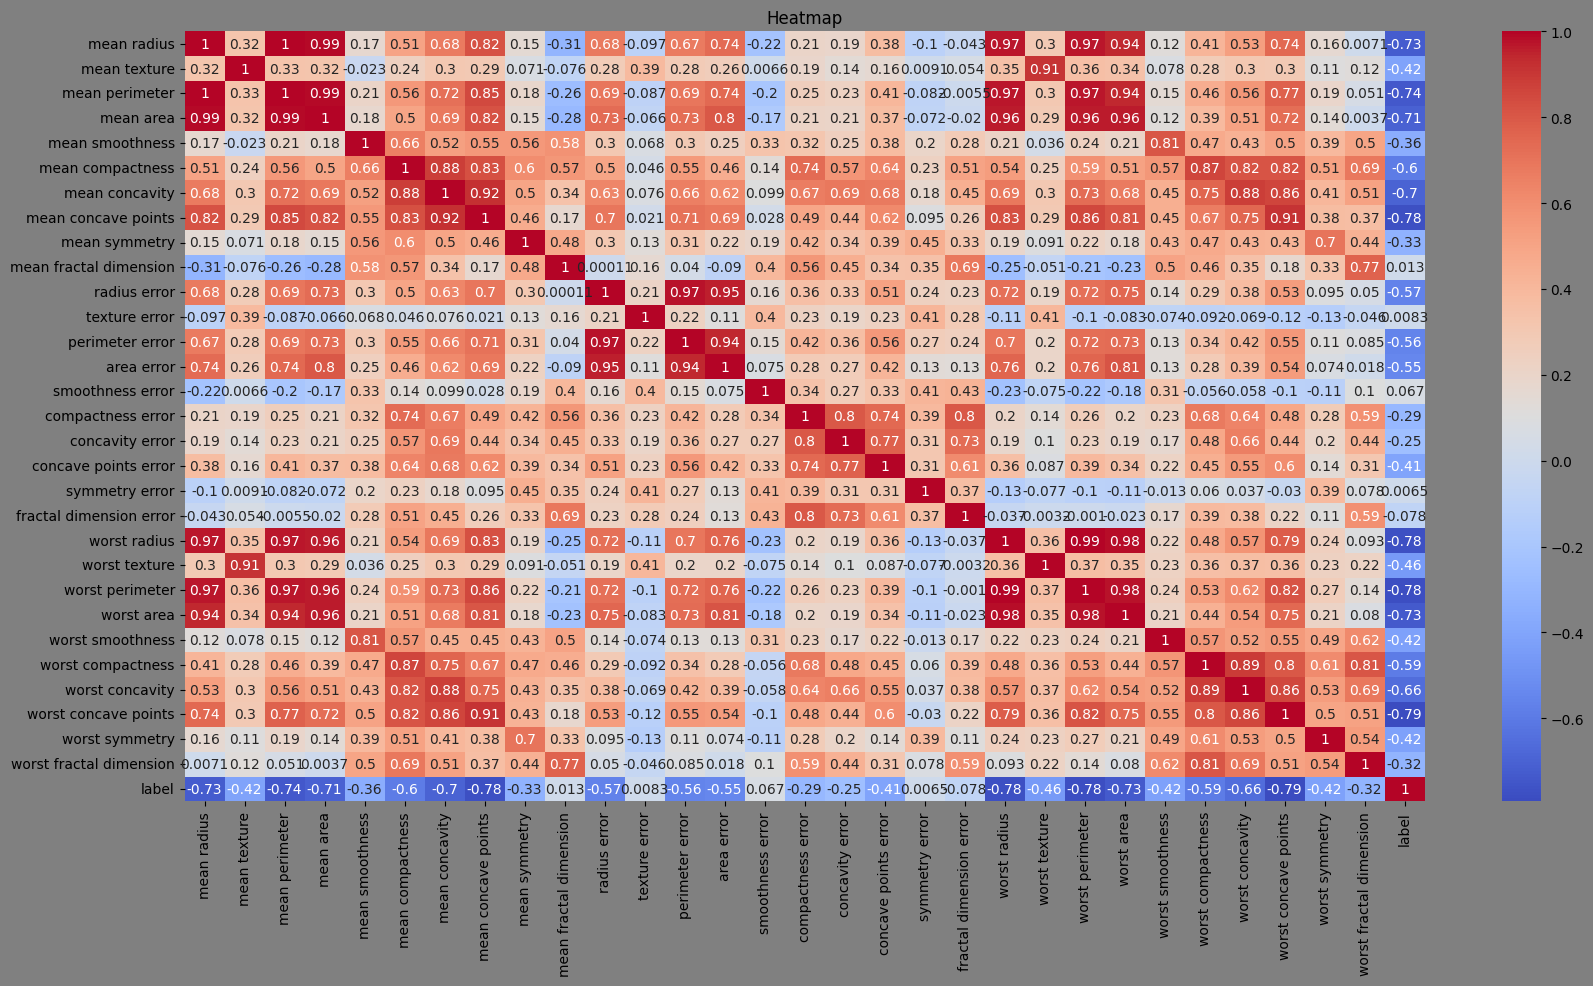

In [17]:
# Ploting Heatmap to get corelation of each variabel with each other
plt.figure(figsize = (20,10), facecolor = 'gray')
sns.heatmap(df.corr(),cmap='coolwarm' ,annot = True)
plt.title("Heatmap")
plt.show()

## **Data Pre-Processing, Data Splitting and Feature Selection.**

In [30]:
# Data splitting into training and testing set
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Feature selection
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=12)
x = rfe.fit_transform(x, y)
# spliting dataset uing train_test_split module
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

print(x_train.shape)
print(y_train.shape)

(455, 12)
(455,)


## **Machine Learning**

In [31]:
# creating function for printing the model evaluation
def print_evaluate(true, predicted):
  Accuracy_score = accuracy_score(true,predicted)
  precision_score_ = precision_score(true,predicted)
  Recall_score_ = recall_score(true,predicted)
  F1_score_ = f1_score(true,predicted)

  print("___________________________________")
  print(f'Accuracy Score : {Accuracy_score}')
  print(f"Precision Score : {precision_score_}")
  print(f'Recall Score : {Recall_score_}')
  print(f'F1 Score : {F1_score_}')
  print('___________________________________')

### Model  - Random Forest Classifier

In [32]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define a range of hyperparameters for tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}


# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


# Fit the model to the training data with cross-validation
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [33]:
# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}


In [34]:
# Train the Random Forest Classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_features='auto', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=10, random_state=42)

In [35]:
# Making Prediction of training and testing dataset
train_pred = best_rf_classifier.predict(x_train)
test_pred = best_rf_classifier.predict(x_test)

# Printing Model performance on training dataset
print("Model Performance on Training Dataset")
print_evaluate(y_train,train_pred)
print("Model Performance on Testing Dataset")
print_evaluate(y_test,test_pred)

Model Performance on Training Dataset
___________________________________
Accuracy Score : 0.9846153846153847
Precision Score : 0.9826989619377162
Recall Score : 0.993006993006993
F1 Score : 0.9878260869565217
___________________________________
Model Performance on Testing Dataset
___________________________________
Accuracy Score : 0.9649122807017544
Precision Score : 0.958904109589041
Recall Score : 0.9859154929577465
F1 Score : 0.9722222222222222
___________________________________


<Figure size 640x480 with 0 Axes>

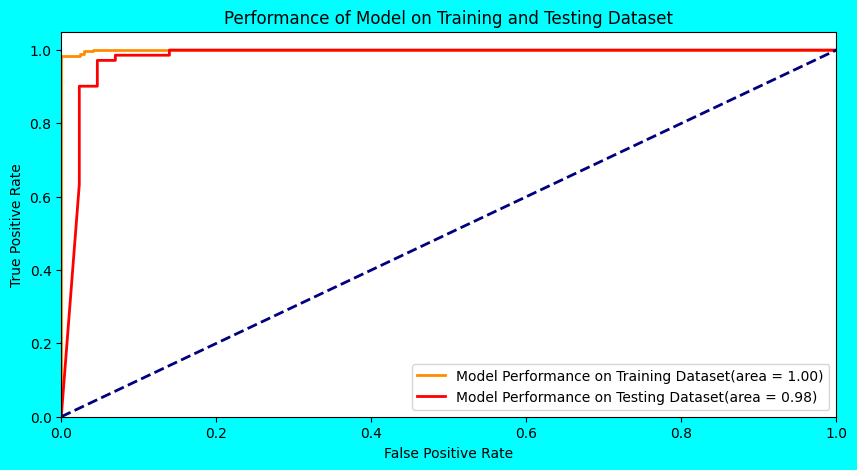

In [37]:
# ploting the ROC curve for Training and Testing dataset for model performance
train_prob = best_rf_classifier.predict_proba(x_train)[:, 1]

test_prob = best_rf_classifier.predict_proba(x_test)[:,1]

# calculating the ROC curve on training dataset
fpr, tpr, thresholds = roc_curve(y_train, train_prob)

# calculating the ROC curve of testing dataset
fpr1, tpr1 , thresholds1 = roc_curve(y_test,test_prob)

# Calculate the AUC (Area Under the Curve) for training dataset
roc_auc = auc(fpr, tpr)

# Calculate the AUC (Area Under the Curve) for testing dataset
roc_auc1 = auc(fpr1,tpr1)

# Plot the ROC curve
plt.figure()
plt.figure(figsize =(10,5), facecolor = 'aqua')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Model Performance on Training Dataset(area = %0.2f)' % roc_auc)
plt.plot(fpr1,tpr1, color = 'red', lw = 2,label = 'Model Performance on Testing Dataset(area = %0.2f)' %roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Performance of Model on Training and Testing Dataset')
plt.legend(loc="lower right")
plt.plot()
plt.show()

# **Conclusion**

In conclusion, this project successfully developed a machine learning model for breast cancer detection that achieved high accuracy on both the training and testing datasets. The Random Forest Classifier demonstrated its effectiveness in classifying breast cancer cases based on clinical and diagnostic features.

The project's structured approach, including data analysis, preprocessing, and feature selection, contributed to the model's accuracy and reliability. During training, the model achieved an impressive accuracy of 98%, showcasing its ability to learn from the dataset.

When tested on unseen data, the model maintained a high level of accuracy, achieving a testing accuracy score of 96%. This result is particularly promising as it suggests that the model generalizes well to real-world scenarios and can reliably detect potential breast cancer cases based on the features it learned from the training data.

The developed breast cancer detection model has the potential to serve as a valuable tool for medical professionals by assisting in the early identification of potential breast cancer cases. It may contribute to improved patient outcomes through early intervention and timely treatment. Further validation and integration into clinical practice may be explored to maximize its impact on breast cancer detection and patient care.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***